# Quality Assessment
Now it's your turn. Follow the steps on the platform and use what you've learnt to see how reliable the data is.

In [1]:
import pandas as pd

Load our cleaned DataFrames

In [2]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

In [3]:
orders_cl

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226899,527397,2018-03-14 13:56:38,42.99,Place Order
226900,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226901,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226902,527400,2018-03-14 13:57:41,19.98,Shopping Basket


In [4]:
orderlines_cl

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
216245,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
216246,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
216247,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
216248,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [5]:
products_cl

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364
...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392


Let's create a copy of our DataFrames, to make sure any of our changes won't affect the original DataFrame. We'll also change the DataFrames from `_cl` to `_qu`, so we can distinguish between the data that has been cleaned, and that which has been quality controlled.

In [6]:
orders_qu = orders_cl.copy()
orderlines_qu = orderlines_cl.copy()
products_qu = products_cl.copy()

## 1.&nbsp; Define Pandas display format

In [7]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_rows", 1000)

## 2.&nbsp; Exclude unwanted orders

### `orders` - Keep only orders with the state you want to work with
No `shopping cart`, `cancelled` etc...

In [8]:
orders_qu.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


Let's look at the make up of `state`.

In [9]:
orders_qu.state.value_counts()

,count
state,
Shopping Basket,117809
Completed,46605
Place Order,40883
Pending,14374
Cancelled,7233


Seems like an overwhelming amount of the orders are left in the shopping basket - something we'll have to analyse another time. For this task we're interested in only `completed` orders, so let's filter our DataFrame.

In [10]:
# keep only completed orders
completed_orders_df = orders_qu.loc[orders_qu.state == "Completed", :]

In [11]:
orders_qu.shape

(226904, 4)

# Using inner merge:

In [12]:
orders_orderlines = completed_orders_df.merge(orderlines_qu, how="inner", left_on="order_id", right_on="id_order")#[["order_id"]]

In [13]:
# reference list of shared / common order_ids
order_ids = orders_orderlines["order_id"].unique()

In [14]:
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(order_ids)]

In [15]:
orderlines_qu = orderlines_qu.loc[orderlines_qu["id_order"].isin(order_ids)]

Using set methods:

In [16]:
orders_set = set(completed_orders_df["order_id"])

In [17]:
orderlines_set = set(orderlines_qu["id_order"].unique())

In [18]:
common_order_ids = orders_set.intersection(orderlines_set)

In [19]:
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(common_order_ids)]

In [20]:
orderlines_qu = orderlines_qu.loc[orderlines_qu["id_order"].isin(common_order_ids)]

In [21]:
orders_qu["order_id"].nunique(), orderlines_qu["id_order"].nunique() # deleate skus?

(43064, 43064)

### Keep only the orders that are present in both `orders` and `orderlines`

Let's begin by looking if there's a big difference between the amount of orders present in `orders` and `orderlines`.

In [22]:
orders_qu.order_id.nunique()

43064

In [23]:
orderlines_qu.id_order.nunique()

43064

What a huge difference! We want to make sure that every order_id in `orders` also exists in `orderlines` and vice versa.

Hence we'll perform an inner merge on the two tables using the `order_id` & `id_order`. This will then keep only the `order_id`'s that are present in both tables, which will then help us filter our `_qu` DataFrames once again.

In [24]:
orders_orderlines = orders_qu.merge(orderlines_qu, how="inner", left_on="order_id", right_on="id_order")

In [25]:
# order_ids that are in both tables
order_ids = orders_orderlines["order_id"].unique()

In [26]:
order_ids

array([241423, 242832, 243330, ..., 527074, 527096, 527112])

In [27]:
# keep those ids in orders
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(order_ids), :]

# keep those ids in orderlines
orderlines_qu = orderlines_qu.loc[orderlines_qu["id_order"].isin(order_ids), :]

Let's have a quick check to make sure we're filtering both DataFrames the same. They should both contain the same number of unique `order_id`'s.

In [28]:
orders_qu["order_id"].nunique(), orderlines_qu["id_order"].nunique()

(43064, 43064)

## 3.&nbsp; Exclude orders with unknown products

Let's start by investigating `orderlines` and `products`. We want to make sure that every product in `orderlines` has a matching entry in `products`. All orders with a missing product need to be removed from both `orderlines` and `orders`.

A left-join can help us here:

Joining `orderlines` left on `products` will keep all orderlines, and add the information of `products` on the matching skus. If an sku has been sold in `orderlines`, but the sku does not have an entry in `products` then the product_name will be empty.

In [29]:
orderlines_products = orderlines_qu.merge(products_qu, how="left", on = "sku")[["id_order","sku","name" ]]
orderlines_products.sample(10)

,id_order,sku,name
41554,466732,APP2515,Silicon Case Cover Apple iPhone 8/7 Violeta
21739,390701,OWC0232,OWC USB Dock-C 10-port power 80W Gray Space
20388,385664,TRK0009,Bravo Trackr Locator Plata
35984,444062,BEL0371,Belkin Impulse Line Slim Backpack MacBook
36784,446508,BOO0092,"Booq M Hardcase Case MacBook 15 ""(Late 2016) B..."
52697,510503,SAT0057,Satechi USB Hub Adapter Pro-C PD Space Gray
976,302659,TPL0007,TP-Link Archer V1 T4UH USB Wi-Fi adapter AC120...
18627,380085,IFX0044,iFixit hard drive bracket Cable MacBook Pro 13...
52954,511435,SNN0037,Sonnet Allegro 4 USB 3.0 ports PCIe
1537,304738,LAC0208,LaCie d2 Hard Drive 8TB Thunderbolt 2 USB 3.0


We can count how many missing products we have.

In [30]:
orderlines_products.name.isna().value_counts()

,count
name,
False,55320
True,1394


Looks like the vast majority of products are known.

We can't simply delete the rows containing unknown products. We need to remove the entirety of any order that contains an unknown product to keep a consistent and coherent dataset.

In [31]:
orders_to_delete = orderlines_products.loc[orderlines_products.name.isna(), "id_order"].unique()
orders_to_delete

array([299638, 299706, 299712, ..., 526106, 526122, 526363])

Keep only orders in `orders` and `orderlines`, that are not in this list of corrupted orders.

In [32]:
orders_qu = orders_qu.loc[~orders_qu.order_id.isin(orders_to_delete),:]

In [33]:
orderlines_qu = orderlines_qu.loc[~orderlines_qu.id_order.isin(orders_to_delete),:]

Let's have a quick check to make sure we're filtering both DataFrames the same. They should both contain the same number of unique `order_id`'s.

In [34]:
orders_qu["order_id"].nunique(), orderlines_qu["id_order"].nunique()

(41701, 41701)

## 4.&nbsp; Explore the revenue from different tables

In a consistent and coherent dataset the value of an order should roughly match the sum of all items bought on that order. Let's investigate...

In [35]:
orderlines_qu_copy = orderlines_qu.copy()

In [36]:
orders_qu_copy = orders_qu.copy()

#### Step 1:
Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [37]:
orderlines_qu_copy["unit_price_total"] = orderlines_qu_copy["product_quantity"] * orderlines_qu_copy["unit_price"]

In [38]:
orderlines_qu_copy.tail(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
215873,1649440,527035,0,1,APP0498,23.00,2018-03-14 11:41:55,23.00
215874,1649441,527034,0,1,APP0927,13.99,2018-03-14 11:42:01,13.99
215876,1649446,527042,0,1,APP0927,13.99,2018-03-14 11:42:38,13.99
215877,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99
215886,1649468,525664,0,1,TUC0336,7.93,2018-03-14 11:43:59,7.93
215889,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,16.52
215906,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
215911,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
215932,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97
215949,1649593,527112,0,1,APP0698,9.99,2018-03-14 11:58:13,9.99


#### Step 2:
Group by `id_order`, summarising by the sum of `unit_price_total`

In [39]:
orderlines_order_ids = orderlines_qu_copy.groupby("id_order", as_index=False)["unit_price_total"].sum()
# as_index=False changes the return so that the groupedby column remains a column (not the index)

In [40]:
orderlines_order_ids

,id_order,unit_price_total
0,241423,129.16
1,242832,10.77
2,243330,77.99
3,245275,149.00
4,245595,105.98
...,...,...
41696,527042,13.99
41697,527070,19.98
41698,527074,19.98
41699,527096,29.97


### What is the average difference between `total_paid` and `unit_price_total`?

Let's merge our grouped `orderlines` table with the `orders` table, so we can calculate the differences in prices.

In [41]:
diff_df = orders_qu_copy.merge(orderlines_order_ids, left_on="order_id", right_on="id_order")

In [42]:
diff_df["difference"] = diff_df["total_paid"] - diff_df["unit_price_total"]
diff_df.head(10)

,order_id,created_date,total_paid,state,id_order,unit_price_total,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98,6.99
5,246405,2017-11-24 10:01:27,407.96,Completed,246405,275.75,132.21
6,247524,2018-01-09 14:21:34,167.98,Completed,247524,162.99,4.99
7,247643,2017-05-26 11:50:35,153.54,Completed,247643,153.54,0.00
8,250275,2017-11-19 22:34:54,54.99,Completed,250275,51.00,3.99
9,251302,2017-05-10 12:27:33,140.99,Completed,251302,140.99,0.00


Now that we know the difference for each order, we can compute the average.

In [43]:
diff_df.difference.mean().round(2)

np.float64(4.47)

### What is the distribution of these differences?

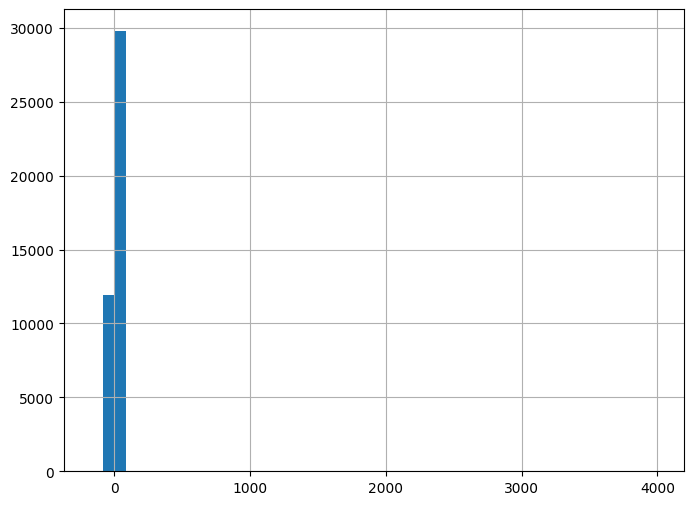

In [44]:
diff_df.difference.hist(bins= 50, figsize=(8,6));

Looking at the spread of the data above, some of the difference must be due to corruption. Let's use `.describe()` to investigate the distribution further.

In [45]:
diff_df.difference.describe()

,difference
count,41701.00
mean,4.47
std,26.05
min,-165.00
25%,0.00
50%,4.99
75%,6.99
max,3984.99


We can see from the our quartiles (0.00, 4.99, 6.99) that most of our data fits an expected pattern - free, 4.99, and 6.99 all seem like reasonable prices to assume as postage. However, look at the min and the max values, -165.00 and 3984.99, this can only occur due to corrupted data.

### Can all the differences be explained by shipping costs? If not, what are other plausible explanations?

What reasons have you come up with to explain the difference?

### If there are differences that you can’t explain: what should you do with these orders?
There's a rule of thumb, that anything:
+ lower than the 25% quartile - (1.5 x interquartile range), or
+ higher than the 75% quartile + (1.5 x interquartile range)

is an outlier. Let's use this rule to try and exclude any corrupted data.

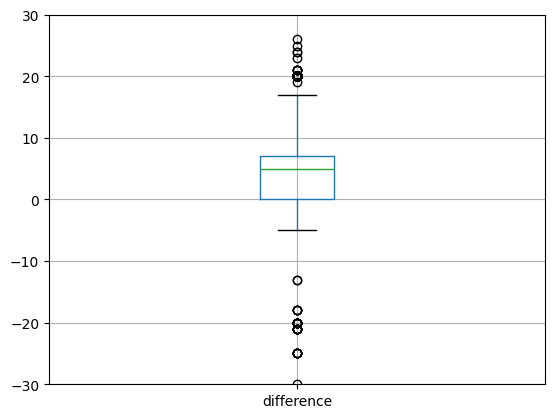

In [46]:
# We know this rule from the boxplot
import matplotlib.pyplot as plt

ax = diff_df.boxplot("difference");
ax.set_ylim(-30, +30)
plt.show()

In [47]:
# calculate the quartiles
Q1 = diff_df["difference"].quantile(0.25)
Q3 = diff_df["difference"].quantile(0.75)

Q1, Q3

(np.float64(0.0), np.float64(6.989999999999981))

In [48]:
# calculate the interquartile range
IQR = Q3-Q1
IQR

np.float64(6.989999999999981)

In [49]:
# lower boundary
Q1 - 1.5*IQR

np.float64(-10.484999999999971)

In [50]:
# upper boundary
Q3 + 1.5*IQR

np.float64(17.47499999999995)

In [51]:
# filter the DataFrame to include only "non-outliers"
diff_no_outliers_df = diff_df.loc[
    (diff_df["difference"] >= (Q1 - 1.5*IQR))
    &
    (diff_df["difference"] <= (Q3 + 1.5*IQR))
    ,
    :]

Let's look at the distribution again to see the effect of removing the outliers.

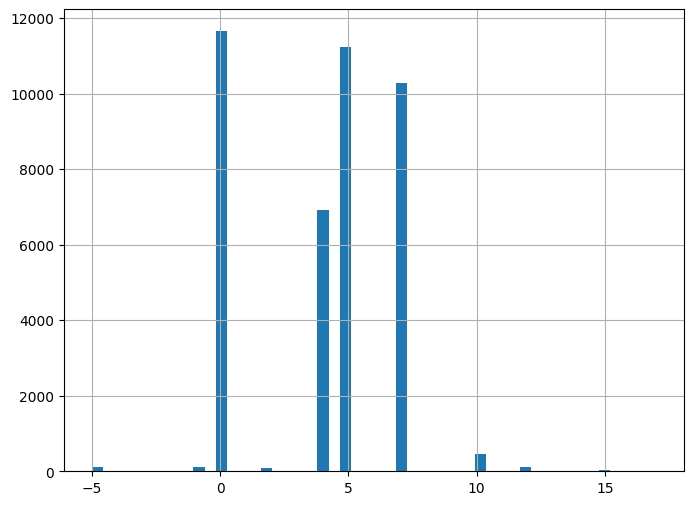

In [52]:
diff_no_outliers_df.difference.hist(bins= 50, figsize=(8,6));

<Axes: >

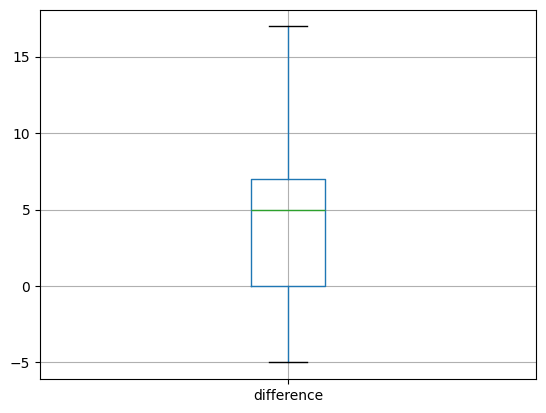

In [53]:
diff_no_outliers_df.boxplot("difference")

This looks much more like what we would expect: a small difference, but nothing extreme.

Now we need to remove these orders with extreme differences from our `orders_lines_merged` DataFrame.

In [54]:
normal_diff_list = diff_no_outliers_df["order_id"]

In [55]:
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(normal_diff_list), :]
orderlines_qu = orderlines_qu.loc[orderlines_qu["id_order"].isin(normal_diff_list), :]

In [56]:
orders_qu["order_id"].nunique(), orderlines_qu["id_order"].nunique()

(40985, 40985)

## 5.&nbsp; Become confident about your dataset

Let's hear your thoughts about what you discovered.

Let's not forget to download our quality controlled DataFrames

In [57]:
from google.colab import files

orders_qu.to_csv("orders_qu.csv", index=False)
files.download("orders_qu.csv")

orderlines_qu.to_csv("orderlines_qu.csv", index=False)
files.download("orderlines_qu.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
orders_qu

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226544,527042,2018-03-14 11:47:50,18.98,Completed
226572,527070,2018-03-14 11:50:48,24.97,Completed
226576,527074,2018-03-14 11:51:42,24.97,Completed
226598,527096,2018-03-14 11:58:40,34.96,Completed


In [59]:
orderlines_qu

,id,id_order,product_id,product_quantity,sku,unit_price,date
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
15,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
21,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...
215877,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41
215906,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
215911,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
215932,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [60]:
products_qu

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364
...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392


In [61]:
products_orderlines_qu = products_qu.merge(orderlines_qu, how="inner", left_on="sku", right_on="sku")#[["order_id"]]
products_orderlines_qu["discount"] = products_orderlines_qu["unit_price"] - products_orderlines_qu["price"]
products_orderlines_qu

,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,unit_price,date,discount
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1121326,300551,0,1,54.99,2017-01-02 13:34:30,-5.00
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149253,310820,0,1,49.99,2017-01-17 09:37:43,-10.00
2,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149773,311042,0,1,49.99,2017-01-17 15:55:39,-10.00
3,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1181573,324568,0,1,54.99,2017-02-15 13:36:16,-5.00
4,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1188189,327565,0,1,54.99,2017-02-22 13:01:25,-5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1499671,464365,0,1,22.99,2017-12-16 14:38:57,-7.00
53227,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1523146,475426,0,1,19.54,2017-12-28 20:24:02,-10.45
53228,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1559235,490325,0,2,22.99,2018-01-13 23:08:33,-7.00
53229,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1596455,496812,0,1,22.99,2018-02-02 14:23:53,-7.00


In [62]:
products_orderlines_qu["discount_rate"] = (products_orderlines_qu["price"] - products_orderlines_qu["unit_price"]) / products_orderlines_qu["price"]
products_orderlines_qu

,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,unit_price,date,discount,discount_rate
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1121326,300551,0,1,54.99,2017-01-02 13:34:30,-5.00,0.08
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149253,310820,0,1,49.99,2017-01-17 09:37:43,-10.00,0.17
2,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149773,311042,0,1,49.99,2017-01-17 15:55:39,-10.00,0.17
3,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1181573,324568,0,1,54.99,2017-02-15 13:36:16,-5.00,0.08
4,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1188189,327565,0,1,54.99,2017-02-22 13:01:25,-5.00,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1499671,464365,0,1,22.99,2017-12-16 14:38:57,-7.00,0.23
53227,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1523146,475426,0,1,19.54,2017-12-28 20:24:02,-10.45,0.35
53228,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1559235,490325,0,2,22.99,2018-01-13 23:08:33,-7.00,0.23
53229,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1596455,496812,0,1,22.99,2018-02-02 14:23:53,-7.00,0.23


In [63]:
products_orderlines_qu = products_orderlines_qu[products_orderlines_qu["discount_rate"].between(0,1)]
products_orderlines_qu

,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,unit_price,date,discount,discount_rate
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1121326,300551,0,1,54.99,2017-01-02 13:34:30,-5.00,0.08
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149253,310820,0,1,49.99,2017-01-17 09:37:43,-10.00,0.17
2,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149773,311042,0,1,49.99,2017-01-17 15:55:39,-10.00,0.17
3,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1181573,324568,0,1,54.99,2017-02-15 13:36:16,-5.00,0.08
4,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1188189,327565,0,1,54.99,2017-02-22 13:01:25,-5.00,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1499671,464365,0,1,22.99,2017-12-16 14:38:57,-7.00,0.23
53227,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1523146,475426,0,1,19.54,2017-12-28 20:24:02,-10.45,0.35
53228,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1559235,490325,0,2,22.99,2018-01-13 23:08:33,-7.00,0.23
53229,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1596455,496812,0,1,22.99,2018-02-02 14:23:53,-7.00,0.23


In [64]:
products_orderlines_qu["base_revenue"] = products_orderlines_qu["price"] * products_orderlines_qu["product_quantity"]
products_orderlines_qu["actual_revenue"] = products_orderlines_qu["unit_price"] * products_orderlines_qu["product_quantity"]
products_orderlines_qu

/tmp/ipython-input-2660212148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_orderlines_qu["base_revenue"] = products_orderlines_qu["price"] * products_orderlines_qu["product_quantity"]
/tmp/ipython-input-2660212148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_orderlines_qu["actual_revenue"] = products_orderlines_qu["unit_price"] * products_orderlines_qu["product_quantity"]


,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,unit_price,date,discount,discount_rate,base_revenue,actual_revenue
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1121326,300551,0,1,54.99,2017-01-02 13:34:30,-5.00,0.08,59.99,54.99
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149253,310820,0,1,49.99,2017-01-17 09:37:43,-10.00,0.17,59.99,49.99
2,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149773,311042,0,1,49.99,2017-01-17 15:55:39,-10.00,0.17,59.99,49.99
3,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1181573,324568,0,1,54.99,2017-02-15 13:36:16,-5.00,0.08,59.99,54.99
4,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1188189,327565,0,1,54.99,2017-02-22 13:01:25,-5.00,0.08,59.99,54.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1499671,464365,0,1,22.99,2017-12-16 14:38:57,-7.00,0.23,29.99,22.99
53227,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1523146,475426,0,1,19.54,2017-12-28 20:24:02,-10.45,0.35,29.99,19.54
53228,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1559235,490325,0,2,22.99,2018-01-13 23:08:33,-7.00,0.23,59.98,45.98
53229,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1596455,496812,0,1,22.99,2018-02-02 14:23:53,-7.00,0.23,29.99,22.99


In [67]:
products_orderlines_qu["revenue lost"]=products_orderlines_qu["base_revenue"]-products_orderlines_qu["actual_revenue"]
products_orderlines_qu

/tmp/ipython-input-4028665326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_orderlines_qu["revenue lost"]=products_orderlines_qu["base_revenue"]-products_orderlines_qu["actual_revenue"]


,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,unit_price,date,discount,discount_rate,base_revenue,actual_revenue,revenue lost
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1121326,300551,0,1,54.99,2017-01-02 13:34:30,-5.00,0.08,59.99,54.99,5.00
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149253,310820,0,1,49.99,2017-01-17 09:37:43,-10.00,0.17,59.99,49.99,10.00
2,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149773,311042,0,1,49.99,2017-01-17 15:55:39,-10.00,0.17,59.99,49.99,10.00
3,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1181573,324568,0,1,54.99,2017-02-15 13:36:16,-5.00,0.08,59.99,54.99,5.00
4,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1188189,327565,0,1,54.99,2017-02-22 13:01:25,-5.00,0.08,59.99,54.99,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1499671,464365,0,1,22.99,2017-12-16 14:38:57,-7.00,0.23,29.99,22.99,7.00
53227,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1523146,475426,0,1,19.54,2017-12-28 20:24:02,-10.45,0.35,29.99,19.54,10.45
53228,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1559235,490325,0,2,22.99,2018-01-13 23:08:33,-7.00,0.23,59.98,45.98,14.00
53229,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1596455,496812,0,1,22.99,2018-02-02 14:23:53,-7.00,0.23,29.99,22.99,7.00


In [68]:
# brands_qu.csv
url = "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands_qu = pd.read_csv(path)
brands_qu

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
5,ALL,Allocacoc
6,AP2,Apple
7,APP,Apple
8,BAN,Band&Strap
9,BEA,Beats


In [69]:
# Clean Brands
# ---------------------------
brands_qu = brands_qu.drop_duplicates(subset=["short"])
brands_qu["short"] = brands_qu["short"].str.strip().str.upper()
brands_qu["long"] = brands_qu["long"].str.strip().str.title()
brands_qu

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
5,ALL,Allocacoc
6,AP2,Apple
7,APP,Apple
8,BAN,Band&Strap
9,BEA,Beats


In [70]:
# Merge Brand info to Products
# ---------------------------
products_orderlines_qu["brand_code"] = products_orderlines_qu["sku"].str[:3]
brands_products_orderlines_qu = products_orderlines_qu.merge(brands_qu, left_on="brand_code", right_on="short", how="left")
brands_products_orderlines_qu

/tmp/ipython-input-108378614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_orderlines_qu["brand_code"] = products_orderlines_qu["sku"].str[:3]


,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,unit_price,date,discount,discount_rate,base_revenue,actual_revenue,revenue lost,brand_code,short,long
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1121326,300551,0,1,54.99,2017-01-02 13:34:30,-5.00,0.08,59.99,54.99,5.00,RAI,RAI,Rain Design
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149253,310820,0,1,49.99,2017-01-17 09:37:43,-10.00,0.17,59.99,49.99,10.00,RAI,RAI,Rain Design
2,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149773,311042,0,1,49.99,2017-01-17 15:55:39,-10.00,0.17,59.99,49.99,10.00,RAI,RAI,Rain Design
3,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1181573,324568,0,1,54.99,2017-02-15 13:36:16,-5.00,0.08,59.99,54.99,5.00,RAI,RAI,Rain Design
4,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1188189,327565,0,1,54.99,2017-02-22 13:01:25,-5.00,0.08,59.99,54.99,5.00,RAI,RAI,Rain Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51655,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1499671,464365,0,1,22.99,2017-12-16 14:38:57,-7.00,0.23,29.99,22.99,7.00,MMW,MMW,My Mw
51656,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1523146,475426,0,1,19.54,2017-12-28 20:24:02,-10.45,0.35,29.99,19.54,10.45,MMW,MMW,My Mw
51657,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1559235,490325,0,2,22.99,2018-01-13 23:08:33,-7.00,0.23,59.98,45.98,14.00,MMW,MMW,My Mw
51658,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1596455,496812,0,1,22.99,2018-02-02 14:23:53,-7.00,0.23,29.99,22.99,7.00,MMW,MMW,My Mw


In [71]:
# ---------------------------
# Aggregate Revenue by Brand
# ---------------------------
brand_revenue = brands_products_orderlines_qu.groupby("long").agg(
    base_revenue=("base_revenue","sum"),
    actual_revenue=("actual_revenue","sum")
).reset_index()

brand_revenue["revenue_loss"] = brand_revenue["base_revenue"] - brand_revenue["actual_revenue"]
brand_revenue["discount_impact_pct"] = brand_revenue["revenue_loss"] / brand_revenue["base_revenue"]
brand_revenue.sort_values(by="revenue_loss", ascending=False)


,long,base_revenue,actual_revenue,revenue_loss,discount_impact_pct
5,Apple,2753117.67,2442779.31,310338.36,0.11
110,Pack,609761.56,462257.80,147503.76,0.24
109,Owc,562716.96,453923.07,108793.89,0.19
165,Western Digital,444561.56,361960.04,82601.52,0.19
164,Wacom,346878.22,274160.74,72717.48,0.21
23,Dell,317465.57,258902.07,58563.50,0.18
69,Lacie,464604.83,409150.05,55454.78,0.12
19,Crucial,314439.24,268503.00,45936.24,0.15
132,Seagate,188138.40,148826.45,39311.95,0.21
95,Newertech,127452.49,89397.84,38054.65,0.30


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

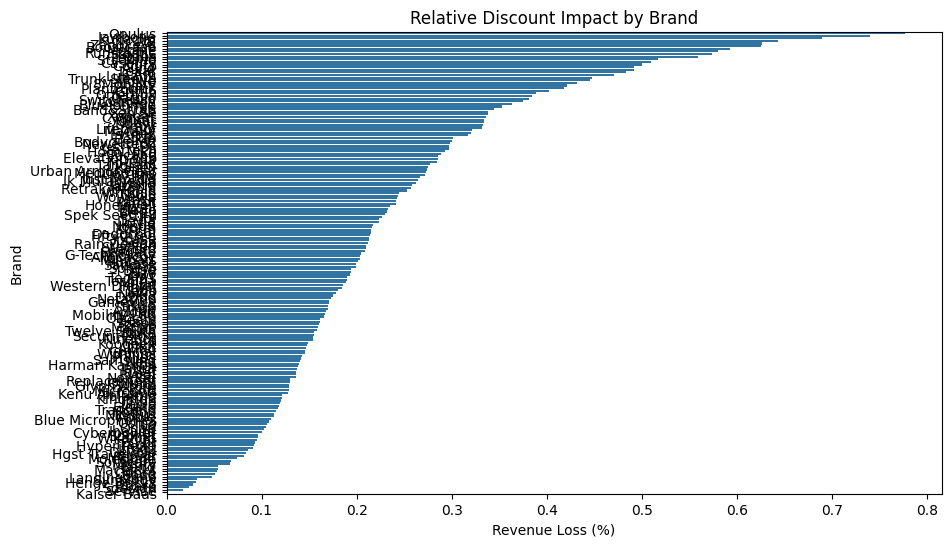

In [74]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=brand_revenue.sort_values("discount_impact_pct", ascending=False),
    x="discount_impact_pct",
    y="long",
    errorbar=None
)

plt.xlabel("Revenue Loss (%)")
plt.ylabel("Brand")
plt.title("Relative Discount Impact by Brand")

plt.show()

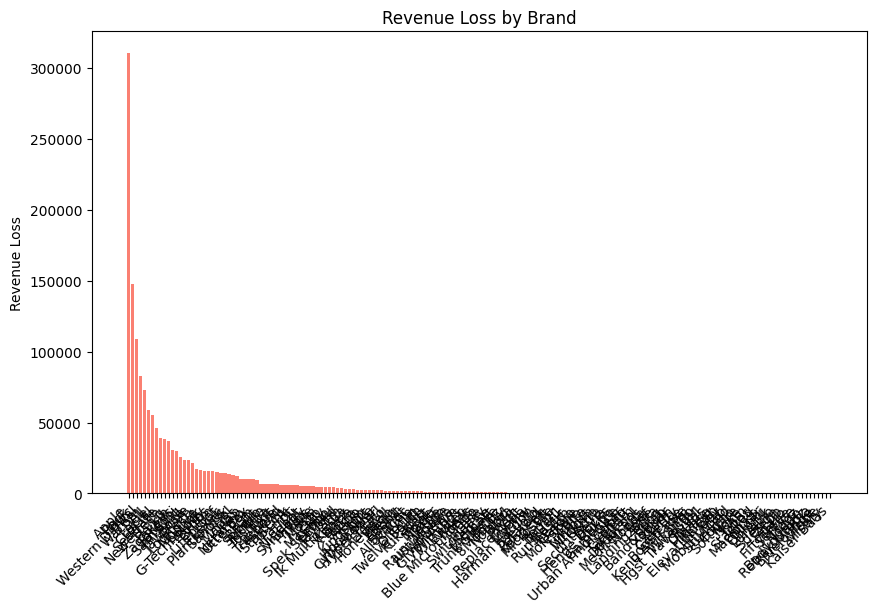

In [75]:
import matplotlib.pyplot as plt

# Sort brands by revenue_loss
brand_revenue_sorted = brand_revenue.sort_values(by="revenue_loss", ascending=False)

plt.figure(figsize=(10,6))
plt.bar(
    brand_revenue_sorted["long"],
    brand_revenue_sorted["revenue_loss"],
    color="salmon"
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Revenue Loss")
plt.title("Revenue Loss by Brand")
plt.show()

In [76]:
brand_revenue["discount_impact_pct"].mean

<bound method Series.mean of 0     0.43
1     0.17
2     0.49
3     0.15
4     0.20
5     0.11
6     0.34
7     0.23
8     0.16
9     0.30
10    0.05
11    0.11
12    0.36
13    0.30
14    0.05
15    0.63
16    0.19
17    0.51
18    0.50
19    0.15
20    0.10
21    0.34
22    0.42
23    0.18
24    0.22
25    0.09
26    0.30
27    0.21
28    0.18
29    0.19
30    0.23
31    0.29
32    0.12
33    0.32
34    0.22
35    0.03
36    0.21
37    0.14
38    0.20
39    0.17
40    0.13
41    0.05
42    0.40
43    0.14
44    0.03
45    0.08
46    0.20
47    0.29
48    0.24
49    0.09
50    0.48
51    0.15
52    0.09
53    0.10
54    0.26
55    0.21
56    0.22
57    0.14
58    0.74
59    0.26
60    0.23
61    0.33
62    0.27
63    0.00
64    0.27
65    0.13
66    0.12
67    0.15
68    0.69
69    0.12
70    0.05
71    0.14
72    0.49
73    0.11
74    0.33
75    0.17
76    0.38
77    0.47
78    0.32
79    0.05
80    0.16
81    0.27
82    0.13
83    0.20
84    0.07
85    0.17
86    0.07
87    0.59
88    0.24
89    0.45
90    0.19
91    0.27
92    0.33
93    0.14
94    0.17
95    0.30
96    0.11
97    0.15
98    0.12
99    0.16
100   0.18
101   0.14
102   0.22
103   0.13
104   0.33
105   0.17
106   0.78
107   0.11
108   0.39
109   0.19
110   0.24
111   0.24
112   0.56
113   0.14
114   0.42
115   0.12
116   0.64
117   0.10
118   0.17
119   0.38
120   0.57
121   0.10
122   0.21
123   0.08
124   0.13
125   0.26
126   0.58
127   0.14
128   0.14
129   0.20
130   0.26
131   0.02
132   0.21
133   0.16
134   0.34
135   0.21
136   0.02
137   0.07
138   0.10
139   0.16
140   0.23
141   0.20
142   0.21
143   0.30
144   0.17
145   0.52
146   0.32
147   0.38
148   0.03
149   0.18
150   0.28
151   0.19
152   0.24
153   0.15
154   0.35
155   0.19
156   0.28
157   0.09
158   0.12
159   0.12
160   0.45
161   0.29
162   0.16
163   0.27
164   0.21
165   0.19
166   0.25
167   0.10
168   0.15
169   0.24
170   0.29
171   0.13
172   0.34
173   0.22
174   0.63
175   0.16
Name: discount_impact_pct, dtype: float64>

In [77]:
# Flag discounted rows:

products_orderlines_qu["is_discounted"] = products_orderlines_qu["discount_rate"] > 0


# Handle edge cases:

products_orderlines_qu.loc[products_orderlines_qu["price"] <= 0,
"discount_rate"] = 0

products_orderlines_orders_qu = products_orderlines_qu.merge(orders_qu, left_on="id_order", right_on="order_id", how="left")
products_orderlines_orders_qu

/tmp/ipython-input-3269687611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_orderlines_qu["is_discounted"] = products_orderlines_qu["discount_rate"] > 0


,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,...,discount_rate,base_revenue,actual_revenue,revenue lost,brand_code,is_discounted,order_id,created_date,total_paid,state
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1121326,300551,0,1,...,0.08,59.99,54.99,5.00,RAI,True,300551,2017-01-02 13:37:16,54.99,Completed
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149253,310820,0,1,...,0.17,59.99,49.99,10.00,RAI,True,310820,2017-01-17 09:39:32,49.99,Completed
2,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149773,311042,0,1,...,0.17,59.99,49.99,10.00,RAI,True,311042,2017-01-17 16:04:40,49.99,Completed
3,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1181573,324568,0,1,...,0.08,59.99,54.99,5.00,RAI,True,324568,2017-02-15 13:43:09,59.98,Completed
4,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1188189,327565,0,1,...,0.08,59.99,54.99,5.00,RAI,True,327565,2017-02-22 13:22:25,248.96,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51655,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1499671,464365,0,1,...,0.23,29.99,22.99,7.00,MMW,True,464365,2017-12-16 14:47:48,27.98,Completed
51656,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1523146,475426,0,1,...,0.35,29.99,19.54,10.45,MMW,True,475426,2017-12-28 20:41:08,24.53,Completed
51657,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1559235,490325,0,2,...,0.23,59.98,45.98,14.00,MMW,True,490325,2018-01-13 23:19:50,135.96,Completed
51658,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1596455,496812,0,1,...,0.23,29.99,22.99,7.00,MMW,True,496812,2018-02-07 12:32:13,104.97,Completed


In [87]:
products_orderlines_orders_qu.duplicated().any()

np.False_

In [114]:
# 5. Order-Level View (Board Perspective)

# Aggregate back to the order level.

orders_kpi = (
    products_orderlines_orders_qu.groupby("order_id")
    .agg(
        order_date=("created_date", "first"),
        total_paid=("total_paid", "first"),
        product_quantity=("product_quantity", "sum"),
        order_revenue=("actual_revenue", "sum"),
        discounted=("is_discounted", "any") # True if at least one product was discounted, False if no products were discounted
    )
    .reset_index()
)

orders_kpi

,order_id,order_date,total_paid,product_quantity,order_revenue,discounted
0,241423,2017-11-06 13:10:02,136.15,1,129.16,True
1,242832,2017-12-31 17:40:03,15.76,1,10.77,True
2,243330,2017-02-16 10:59:38,84.98,1,77.99,True
3,245275,2017-06-28 11:35:37,149.00,1,149.00,True
4,245595,2017-01-21 12:52:47,112.97,2,105.98,True
...,...,...,...,...,...,...
39946,527042,2018-03-14 11:47:50,18.98,1,13.99,True
39947,527070,2018-03-14 11:50:48,24.97,2,19.98,True
39948,527074,2018-03-14 11:51:42,24.97,2,19.98,True
39949,527096,2018-03-14 11:58:40,34.96,3,29.97,True


In [104]:
# AOV comparison
aov_by_discount=orders_kpi.groupby("discounted")["total_paid"].mean()
aov_by_discount
# Discounted orders → lower AOV
# Non-discounted orders → higher AOV

,total_paid
discounted,
False,143.75
True,195.43


/tmp/ipython-input-3446442632.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


Text(0.5, 0, '')

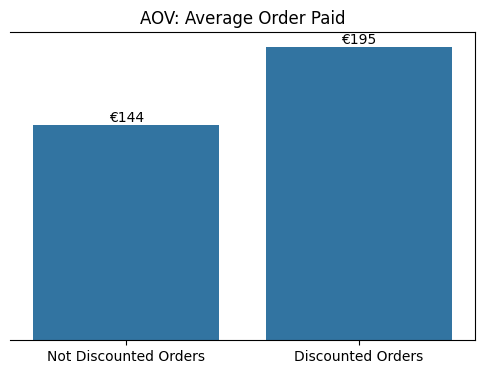

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Series to DataFrame
aov_by_discount_df = aov_by_discount.reset_index()

# Map True/False or 1/0 to readable labels
aov_by_discount_df["discounted"] = aov_by_discount_df["discounted"].map({
    True: "Discounted Orders",
    False: "Not Discounted Orders"
})

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=aov_by_discount_df,
    x="discounted",
    y="total_paid",
    ci=None
)

plt.title("AOV: Average Order Paid")

# ---- Add labels on top of bars in Euro ----
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height,
        s=f'€{height:,.0f}',   # full euro
        ha='center',
        va='bottom',
        fontsize=10
    )

# ---- Remove y-axis and y-axis label ----
ax.set_ylabel('')            # remove y-axis label
ax.set_yticks([])            # remove y-axis ticks
ax.spines['left'].set_visible(False)  # remove left spine

# ---- Remove x-axis label ----
ax.set_xlabel('')            # remove x-a_


/tmp/ipython-input-334366164.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


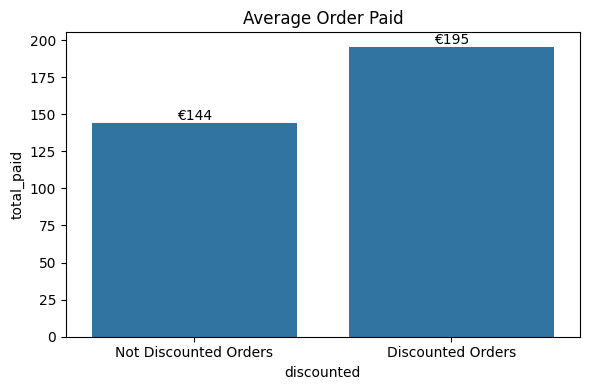

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Series to DataFrame
aov_by_discount_df = aov_by_discount.reset_index()

# Map True/False or 1/0 to readable labels
aov_by_discount_df["discounted"] = aov_by_discount_df["discounted"].map({
    True: "Discounted Orders",
    False: "Not Discounted Orders"
})

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=aov_by_discount_df,
    x="discounted",
    y="total_paid",
    ci=None
)

plt.title("Average Order Paid")

# ---- Add labels on top of bars in Euro ----
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height,
        s=f'€{height:,.0f}',   # full euro with comma separator, no decimals
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [110]:
orders_kpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39951 entries, 0 to 39950
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          39951 non-null  int64  
 1   total_paid        39951 non-null  float64
 2   product_quantity  39951 non-null  int64  
 3   order_revenue     39951 non-null  float64
 4   discounted        39951 non-null  bool   
dtypes: bool(1), float64(2), int64(2)
memory usage: 1.3 MB


In [124]:
orders_kpi["order_date"] = pd.to_datetime(orders_kpi["order_date"])

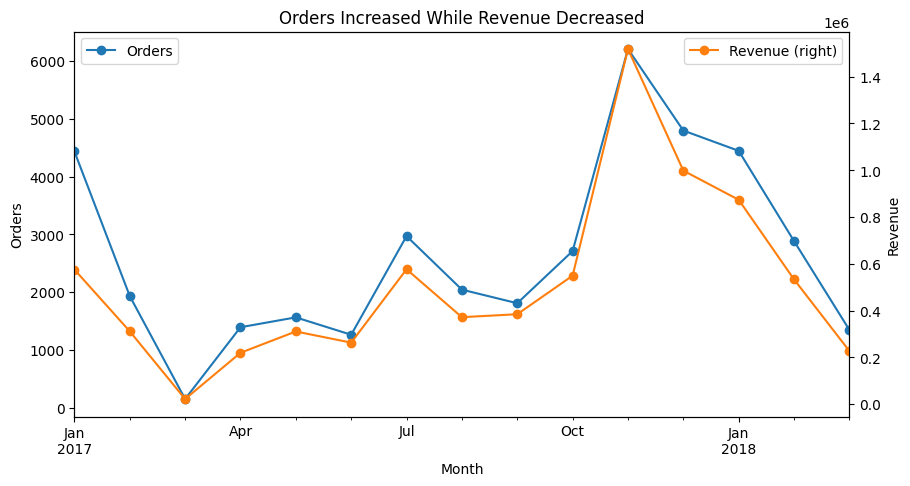

In [128]:
ax = monthly_kpi["orders"].plot(
    kind="line",
    marker="o",
    figsize=(10, 5),
    label="Orders"
)

monthly_kpi["revenue"].plot(
    kind="line",
    marker="o",
    ax=ax,
    secondary_y=True,
    label="Revenue"
)

ax.set_xlabel("Month")
ax.set_ylabel("Orders")
ax.right_ax.set_ylabel("Revenue")

ax.set_title("Orders Increased While Revenue Decreased")
ax.legend(loc="upper left")
ax.right_ax.legend(loc="upper right")

In [131]:
brands_qu.duplicated().any()

np.False_

In [132]:
df_qu = brands_products_orderlines_qu.merge(orders_qu, left_on="id_order", right_on="order_id", how="left")
df_qu

,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,...,base_revenue,actual_revenue,revenue lost,brand_code,short,long,order_id,created_date,total_paid,state
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1121326,300551,0,1,...,59.99,54.99,5.00,RAI,RAI,Rain Design,300551,2017-01-02 13:37:16,54.99,Completed
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149253,310820,0,1,...,59.99,49.99,10.00,RAI,RAI,Rain Design,310820,2017-01-17 09:39:32,49.99,Completed
2,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149773,311042,0,1,...,59.99,49.99,10.00,RAI,RAI,Rain Design,311042,2017-01-17 16:04:40,49.99,Completed
3,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1181573,324568,0,1,...,59.99,54.99,5.00,RAI,RAI,Rain Design,324568,2017-02-15 13:43:09,59.98,Completed
4,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1188189,327565,0,1,...,59.99,54.99,5.00,RAI,RAI,Rain Design,327565,2017-02-22 13:22:25,248.96,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51655,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1499671,464365,0,1,...,29.99,22.99,7.00,MMW,MMW,My Mw,464365,2017-12-16 14:47:48,27.98,Completed
51656,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1523146,475426,0,1,...,29.99,19.54,10.45,MMW,MMW,My Mw,475426,2017-12-28 20:41:08,24.53,Completed
51657,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1559235,490325,0,2,...,59.98,45.98,14.00,MMW,MMW,My Mw,490325,2018-01-13 23:19:50,135.96,Completed
51658,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1596455,496812,0,1,...,29.99,22.99,7.00,MMW,MMW,My Mw,496812,2018-02-07 12:32:13,104.97,Completed


/tmp/ipython-input-2365884269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_orderlines_qu["discount_bucket"] = pd.cut(


<Axes: xlabel='discount_bucket'>

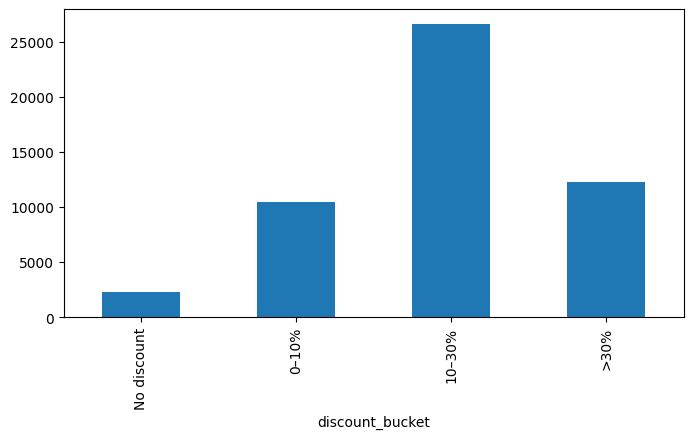

In [133]:
# 7. Discount Intensity Analysis (Marketing vs Board)
# Create discount buckets
products_orderlines_qu["discount_bucket"] = pd.cut(
    products_orderlines_qu["discount_rate"],
    bins=[-0.01, 0, 0.10, 0.30, 1],
    labels=["No discount", "0–10%", "10–30%", ">30%"]
)


(
    products_orderlines_qu["discount_bucket"]
    .value_counts()
    .sort_index()
    .plot(kind="bar", figsize=(8, 4))
)

# Revenue by bucket:

discount_kpi = (
    products_orderlines_qu.groupby("discount_bucket")
    .agg(
        units_sold=("product_quantity", "sum"),
        revenue=("actual_revenue", "sum"),
        avg_discount=("discount_rate", "mean")
    )
)
discount_kpi

discount_kpi[["units_sold", "revenue"]].plot(
    kind="bar",
    figsize=(8,5)
)
plt.ylabel("Units / Revenue")
plt.title("Impact of Discount on Sales and Revenue")

# This reveals: Heavy discounts drive volume, But destroy revenue efficiency

In [138]:
# 8. Product-Level Profitability Signals
product_kpi = (
    df_qu.groupby("sku")
    .agg(
        units_sold=("product_quantity", "sum"),
        actual_revenue=("actual_revenue", "sum"),
        avg_discount=("discount_rate", "mean")
    )
    .reset_index()
)
product_kpi

# Find products where: Discounting increases volume, But total revenue still drops

product_kpi.sort_values("avg_discount", ascending=False).head(10)

,sku,units_sold,actual_revenue,avg_discount
2587,MOP0107,29,191.71,0.90
2588,MOP0108,24,167.76,0.89
2586,MOP0106,23,209.77,0.89
2585,MOP0105,28,269.72,0.89
2589,MOP0109,29,214.73,0.89
109,AP20124,13,64.37,0.86
2368,LIF0038-A,1,12.54,0.84
2889,NTE0039-A,7,68.92,0.84
1626,GRT0459,21,106.29,0.83
3643,PAC2281,1,255.59,0.83


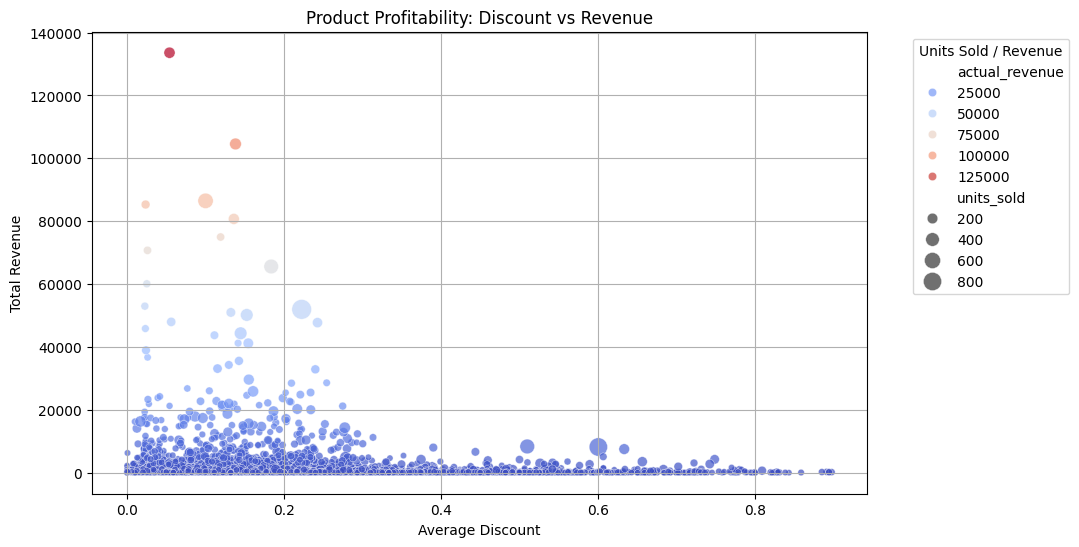

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=product_kpi,
    x="avg_discount",
    y="actual_revenue",
    size="units_sold",
    hue="actual_revenue",  # optional: color by revenue
    palette="coolwarm",
    sizes=(20, 200),
    alpha=0.7
)

plt.xlabel("Average Discount")
plt.ylabel("Total Revenue")
plt.title("Product Profitability: Discount vs Revenue")
plt.legend(title="Units Sold / Revenue", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


Observations

1. Most products (skus) cluster at low discounts (0–0.2):

This means most products either have no discount or only small discounts.

These products have a wide range of revenue (some make high revenue, some very little).

2. Revenue decreases as discount increases:

Products with very high discounts (right side, X>0.5) have very low revenue, even if units sold are moderate.

This visually shows that heavy discounting often does not compensate for lost revenue per unit.

3. Units sold vs revenue trade-off:

Some products with moderate discounts see higher units sold (larger markers), but their total revenue is still low — this is the “discounting increases volume but revenue drops” pattern you were looking for.

These are typically medium X, low Y, medium-large markers.

4. High-revenue products:

The dark red dots near the top left (low discount, high revenue) show that products with little or no discount generate the most revenue, even with smaller units sold.

This is a common insight in retail: sometimes selling fewer units at full price is better than heavy discounting.

Key Takeaways

Heavy discounting often increases units sold but reduces revenue, especially if discounts exceed ~20–30%.

High-revenue products are mostly low-discount SKUs, which should be protected from unnecessary discounts.

The scatter plot effectively highlights which products are “dangerous to discount”. These are candidates for pricing strategy adjustments.

In [143]:
# 9. Brand-Level Risk Analysis (Investor View)
brand_kpi = (
    df_qu.groupby("long")
    .agg(
        revenue=("actual_revenue", "sum"),
        avg_discount=("discount_rate", "mean"),
        units_sold=("product_quantity", "sum")
    )
    .sort_values("revenue", ascending=False)
)

brand_kpi
# Premium brands receiving higher average discounts pose a brand-positioning risk.

,revenue,avg_discount,units_sold
long,,,
Apple,2442779.31,0.17,10975
Pack,462257.80,0.26,1707
Owc,453923.07,0.22,3834
Lacie,409150.05,0.13,1972
Western Digital,361960.04,0.18,2382
Lg,316852.48,0.11,758
Wacom,274160.74,0.20,1788
Crucial,268503.00,0.14,2029
Dell,258902.07,0.18,722


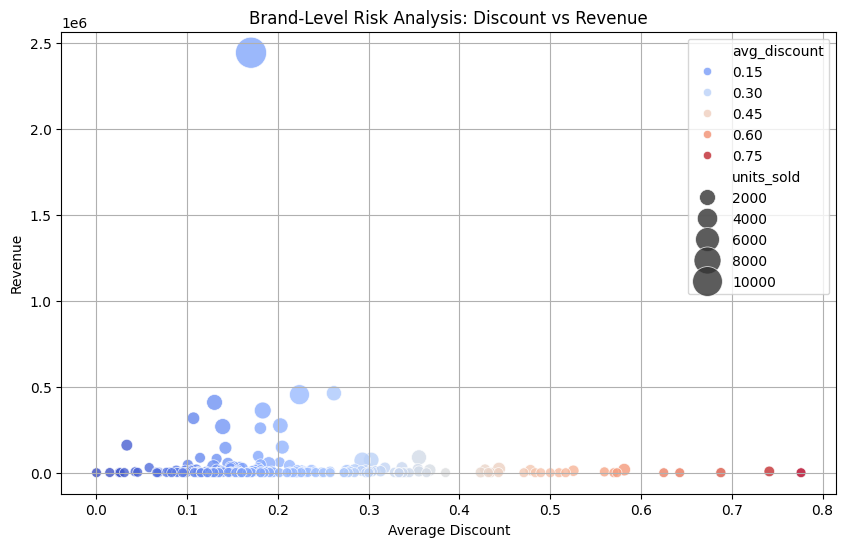

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=brand_kpi.reset_index(),
    x="avg_discount",
    y="revenue",
    size="units_sold",
    hue="avg_discount",  # optional: gradient shows risk
    palette="coolwarm",
    sizes=(50, 500),
    alpha=0.8
)

plt.xlabel("Average Discount")
plt.ylabel("Revenue")
plt.title("Brand-Level Risk Analysis: Discount vs Revenue")
plt.grid(True)
plt.show()


1. X-axis: Average Discount

Shows how heavily each brand discounts its products.

Lower values → conservative discounting.

Higher values → aggressive discounting (up to ~78%).

2. Y-axis: Revenue

Total revenue generated by each brand.

Brands at the top are high-revenue, bottom are low-revenue.

3. Bubble Size: Units Sold

Bigger bubbles → more units sold.

Smaller bubbles → fewer units sold.

4. Bubble Color: Average Discount

Darker/red → bigger discounts.

Lighter/blue → smaller discounts.

Helps visualize if bigger discounts correlate with revenue or units sold.

Key Observations

High revenue is not always tied to high discounts

The biggest bubble (high revenue, mid-low discount ~0.18) shows a brand generating massive revenue without heavy discounts.

Suggests strong brand positioning / pricing power.

Many brands apply moderate discounts (~0.1–0.3)

These are clustered in the lower-middle revenue range.

They sell units but aren’t generating top-tier revenue.

Very high discounts (~0.6–0.78)

Small bubbles, low revenue.

High discounting isn’t boosting revenue; could be hurting margins or brand positioning.

Unit sales vs discount

Larger bubbles appear mostly in moderate discount range (0.1–0.25).

Suggests extreme discounts don’t necessarily lead to higher volume.

✅ Takeaway

Brands with moderate discounts are safer for revenue and brand image.

Over-discounting is risky: little revenue gain, may harm brand positioning.

Top revenue performers rely on strong pricing, not extreme discounts.

 Final Data-Driven Conclusion

“Using completed orders only, discounts clearly increase order volume but reduce average order value.
Heavily discounted products and brands do not generate enough incremental volume to offset revenue loss.
The data supports targeted discounting on selected SKUs, not blanket promotions.”

full, data-driven discount strategy for the entire database of products, not just analysis or a few plots. Let’s design it carefully.

We’ll combine pricing, sales, and discount behavior to produce a complete strategy that tells you which products to discount, by how much, and when.

Step 1: Compute key product metrics

For each product, calculate:
avg_price → recommended price
avg_unit_price → average sold price
discount_rate → fraction of sales sold below recommended price
avg_discount_pct → average percentage discount
total_units → total units sold
total_revenue → total revenue contribution

In [145]:
product_summary = (
    products_orderlines_qu.groupby('sku', as_index=False)
    .agg(
        product_name=('name', 'first'),
        avg_price=('price','mean'),
        avg_unit_price=('unit_price','mean'),
        discount_rate=('is_discounted','mean'),
        avg_discount_pct=('discount_rate','mean'),
        total_units=('unit_price','count'),
        total_revenue=('unit_price','sum')
    )
)
product_summary

,sku,product_name,avg_price,avg_unit_price,discount_rate,avg_discount_pct,total_units,total_revenue
0,8MO0001-A,Open - Micro SD Adapter 8Mobility iSlice Macbo...,35.00,12.96,1.00,0.63,1,12.96
1,8MO0003-A,Open - 8Mobility iSlice Micro SD adapter for M...,35.00,12.85,1.00,0.63,1,12.85
2,8MO0007,8Mobility iSlice Micro SD adapter for Macbook ...,35.00,22.28,1.00,0.36,7,155.93
3,8MO0008,8Mobility iSlice Micro SD Adapter Macbook Pro ...,35.00,21.59,1.00,0.38,10,215.90
4,8MO0009,8Mobility iSlice Micro SD Adapter for Macbook ...,35.00,17.47,1.00,0.50,5,87.37
...,...,...,...,...,...,...,...,...
5032,ZAG0040,Zagg Glass Screen Protector + Contour Contour ...,39.99,26.99,1.00,0.33,1,26.99
5033,ZAG0041,Zagg iPhone Glass Screen Protector + 8 Plus / ...,29.99,19.99,1.00,0.33,1,19.99
5034,ZAG0042,Zagg Glass Screen Protector + iPhone 8/7 / 6 / 6S,29.99,19.99,1.00,0.33,1,19.99
5035,ZEP0007,Zepp Golf Golf Amarillo Sensor Kit,149.99,125.99,1.00,0.16,1,125.99


Step 2: Categorize products by strategy

We define four categories based on sales volume and discount behavior:

Bucket	Criteria	Suggested Strategy
A – Strong sellers	High sales, low discount rate	Sell at full price; optional minor promotions/bundles
B – Price-sensitive high-volume	High sales, moderate discount rate	Apply targeted discounts (5–15%) to boost revenue
C – Slow movers / seasonal	Low sales, high discount rate	Deep discounts (20–40%) or bundles to clear inventory
D – Minor impact / niche	Low sales, low discount rate	Only discount for marketing, loyalty, or bundles


In [313]:
# Determine thresholds:

median_units = product_summary['total_units'].median()
median_discount = product_summary['discount_rate'].median()

def assign_bucket(row):
    if row['total_units'] >= median_units and row['discount_rate'] <= median_discount:
        return 'A - Strong Seller'
    elif row['total_units'] >= median_units and row['discount_rate'] > median_discount:
        return 'B - Price-Sensitive High Volume'
    elif row['total_units'] < median_units and row['discount_rate'] > median_discount:
        return 'C - Slow Mover / Seasonal'
    else:
        return 'D - Minor Impact / Niche'

product_summary['strategy_bucket'] = product_summary.apply(assign_bucket, axis=1)
product_summary['strategy_bucket']

,strategy_bucket
0,D - Minor Impact / Niche
1,D - Minor Impact / Niche
2,A - Strong Seller
3,A - Strong Seller
4,A - Strong Seller
...,...
5032,D - Minor Impact / Niche
5033,D - Minor Impact / Niche
5034,D - Minor Impact / Niche
5035,D - Minor Impact / Niche


 Step 4: Timing considerations

A – Strong sellers: Rare or very small discounts. Only for loyalty programs or bundle promotions.

B – Price-sensitive high volume: Offer discounts during peak periods (holidays, Black Friday, back-to-school). Use limited-time discounts to create urgency.

C – Slow movers / Seasonal: Offer year-end clearance or bundle promotions. Combine with inventory reduction strategies.

D – Minor impact: Occasional marketing/loyalty discounts. Focus on customer acquisition or brand awareness.

In [314]:
# Step 3: Assign discount ranges
# Bucket	Suggested Discount
# A	0–5% (optional bundle/loyalty)
# B	5–15% (targeted, limited-time promotions)
# C	20–40% (clearance, bundles, seasonal)
# D	0–10% (optional marketing purposes)
def suggested_discount(row):
    if row['strategy_bucket'] == 'A - Strong Seller':
        return '0-5%'
    elif row['strategy_bucket'] == 'B - Price-Sensitive High Volume':
        return '5-15%'
    elif row['strategy_bucket'] == 'C - Slow Mover / Seasonal':
        return '20-40%'
    else:  # D
        return '0-10%'

product_summary['recommended_discount'] = product_summary.apply(suggested_discount, axis=1)
product_summary

,sku,product_name,avg_price,avg_unit_price,discount_rate,avg_discount_pct,total_units,total_revenue,strategy_bucket,recommended_discount
0,8MO0001-A,Open - Micro SD Adapter 8Mobility iSlice Macbo...,35.00,12.96,1.00,0.63,1,12.96,D - Minor Impact / Niche,0-10%
1,8MO0003-A,Open - 8Mobility iSlice Micro SD adapter for M...,35.00,12.85,1.00,0.63,1,12.85,D - Minor Impact / Niche,0-10%
2,8MO0007,8Mobility iSlice Micro SD adapter for Macbook ...,35.00,22.28,1.00,0.36,7,155.93,A - Strong Seller,0-5%
3,8MO0008,8Mobility iSlice Micro SD Adapter Macbook Pro ...,35.00,21.59,1.00,0.38,10,215.90,A - Strong Seller,0-5%
4,8MO0009,8Mobility iSlice Micro SD Adapter for Macbook ...,35.00,17.47,1.00,0.50,5,87.37,A - Strong Seller,0-5%
...,...,...,...,...,...,...,...,...,...,...
5032,ZAG0040,Zagg Glass Screen Protector + Contour Contour ...,39.99,26.99,1.00,0.33,1,26.99,D - Minor Impact / Niche,0-10%
5033,ZAG0041,Zagg iPhone Glass Screen Protector + 8 Plus / ...,29.99,19.99,1.00,0.33,1,19.99,D - Minor Impact / Niche,0-10%
5034,ZAG0042,Zagg Glass Screen Protector + iPhone 8/7 / 6 / 6S,29.99,19.99,1.00,0.33,1,19.99,D - Minor Impact / Niche,0-10%
5035,ZEP0007,Zepp Golf Golf Amarillo Sensor Kit,149.99,125.99,1.00,0.16,1,125.99,D - Minor Impact / Niche,0-10%


In [315]:
product_summary['strategy_bucket'].value_counts()

,count
strategy_bucket,
A - Strong Seller,2864
D - Minor Impact / Niche,2173


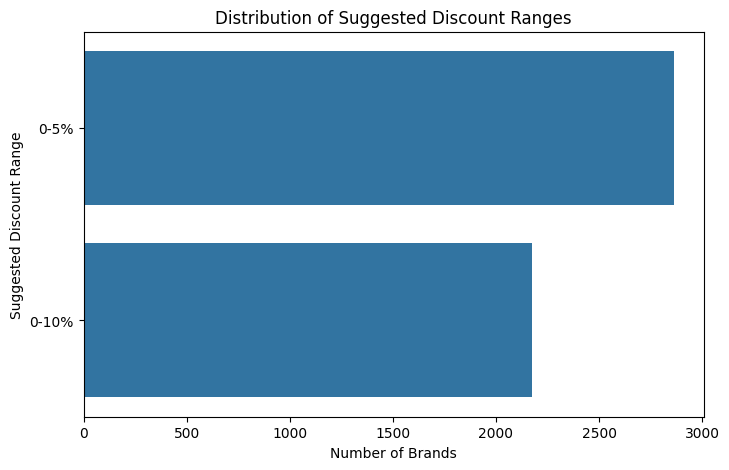

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.countplot(
    data=product_summary,
    y="recommended_discount",
    order=product_summary["recommended_discount"].value_counts().index
)

plt.xlabel("Number of Brands")
plt.ylabel("Suggested Discount Range")
plt.title("Distribution of Suggested Discount Ranges")

plt.show()

Timing considerations

A (0-5%) – Strong sellers: Rare/very small discounts. Loyalty programs/bundle promotions.

B (5-15%) – Price-sensitive high volume: During peak periods (holidays, Black Friday, back-to-school). Limited-time discounts.

C (20-40%) – Slow movers / Seasonal: year-end clearance/bundle promotions + inventory reduction

D (0-10%) – Minor impact: Occasional marketing/loyalty discounts. Focus on customer acquisition or brand awareness.

In [311]:
print(product_summary.columns)

Index(['sku', 'product_name', 'avg_price', 'avg_unit_price', 'discount_rate',
       'avg_discount_pct', 'total_units', 'total_revenue'],
      dtype='object')


Text(0, 0.5, 'Average Sold Price (€)')

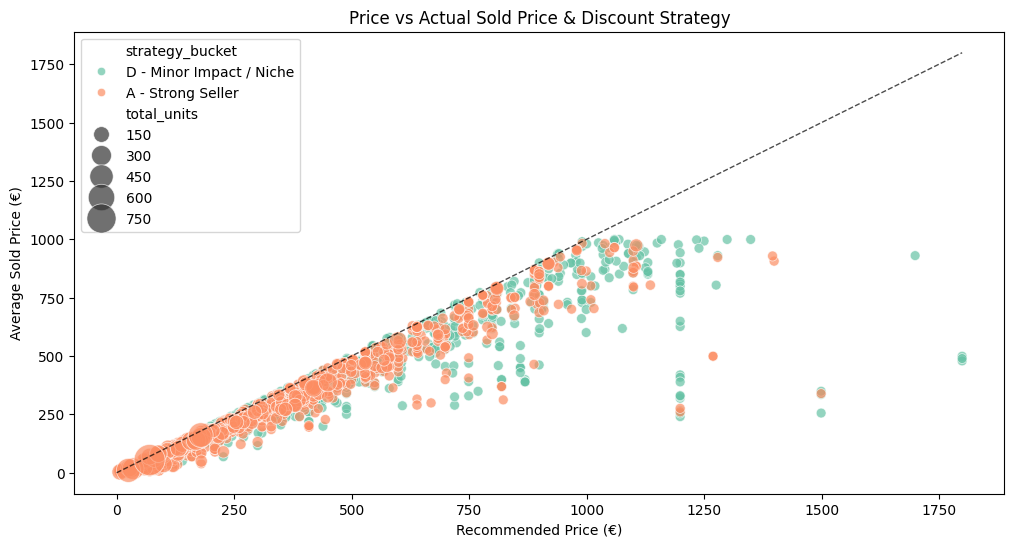

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort DataFrame so bigger points plotted last (in front)
product_summary_sorted = product_summary.sort_values('total_units')

plt.figure(figsize=(12,6))

sns.scatterplot(
    data=product_summary_sorted,
    x='avg_price',
    y='avg_unit_price',
    hue='strategy_bucket',
    size='total_units',
    alpha=0.7,
    palette='Set2',
    sizes=(50, 500)  # optional: control min/max size
)

# Y=X reference line
plt.plot([0, product_summary['avg_price'].max()],
         [0, product_summary['avg_price'].max()],
         'k--', linewidth=1, alpha=0.7)

plt.title("Price vs Actual Sold Price & Discount Strategy")
plt.xlabel("Recommended Price (€)")
plt.ylabel("Average Sold Price (€)")

# Optional: legend inside plot top


X-axis: Recommended price (avg_price)

Y-axis: Average actual sold price (avg_unit_price)

Size of points: total_units sold

Y=X line: where actual sold price = recommended price

Here’s how to read it:

1️⃣ Relation to the Y=X line

Points on the line: Sold at recommended price → no discounts needed.

Points below the line: Actual sold price < recommended → product was discounted.

Points far below the line: Heavily discounted, likely high price sensitivity or clearance products.

2️⃣ Size of points (total_units)

Large points below the line: High volume, frequently discounted → likely B: Price-sensitive high volume.

Small points far below the line: Low volume, heavily discounted → likely C: Slow movers / Seasonal.

Large points on/near the line: Strong sellers, rarely discounted → likely A: Strong sellers.

Small points on/near the line: Minor impact products → likely D: Minor impact.

3️⃣ Color / Strategy bucket

If you’ve mapped your points to a strategy (A–D) via color:

A (Strong sellers): Near/on the line, medium/large points → rare discounts.

B (Price-sensitive high volume): Below the line, large points → offer limited-time discounts during peaks.

C (Slow movers/Seasonal): Below line, small points → year-end clearance, bundle deals.

D (Minor impact): Anywhere, small points → occasional marketing/loyalty discounts.

4️⃣ Timing considerations

Use B for peak sales events (Black Friday, holidays).

Use C at year-end or for seasonal inventory reduction.

A should be mostly untouched, except for loyalty programs.

D can be used to attract new customers without hurting margins.

✅ Quick insight from the plot:

Any cluster below the line is a candidate for discount optimization.

Far below line + large size → urgent action for high-volume discount planning.

On the line + large size → keep pricing stable.

Step 6: Outcome: complete discount strategy across all products, with:

| SKU | Product Name | Avg Price | Avg Sold Price | Discount Rate | Total Revenue | Units Sold | Strategy Bucket | Recommended Discount |

Buckets A–D guide whether to discount and how aggressively.

-> can prioritize B and C products to drive incremental revenue without hurting margins on strong sellers.

how different discount strategies change revenue compared to a baseline (no discount).

1️⃣ Define the strategies (conceptually)
already have:
Base revenue → revenue with no discount
Actual revenue → revenue after discounts

-> can frame strategies like this:
Strategy	       - Interpretation
No discount	     - Baseline (maximum revenue per unit)
Light discounts  - (0–10%)	Revenue-efficient growth
Medium discounts - (10–30%)	Volume-driven growth
Heavy discounts  - (>30%)	Volume spikes, poor efficiency

In [155]:
# 2️⃣ strategy-level view (very important)
strategy_revenue = (
    products_orderlines_qu
    .groupby("discount_bucket")
    .agg(
        base_revenue=("base_revenue", "sum"),
        actual_revenue=("actual_revenue", "sum"),
        units_sold=("product_quantity", "sum")
    )
)

strategy_revenue["revenue_loss"] = (
    strategy_revenue["base_revenue"] - strategy_revenue["actual_revenue"]
)

strategy_revenue["efficiency"] = (
    strategy_revenue["actual_revenue"] / strategy_revenue["units_sold"]
)

strategy_revenue

# This gives:
# How much revenue each strategy generates/ destroys
# Revenue efficiency per unit

/tmp/ipython-input-2223686110.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("discount_bucket")


,base_revenue,actual_revenue,units_sold,revenue_loss,efficiency
discount_bucket,,,,,
No discount,241598.04,241598.04,2561,0.00,94.34
0–10%,2776558.87,2647204.05,11693,129354.82,226.39
10–30%,4884047.57,3989062.56,30097,894985.01,132.54
>30%,1135847.76,605856.81,13880,529990.95,43.65


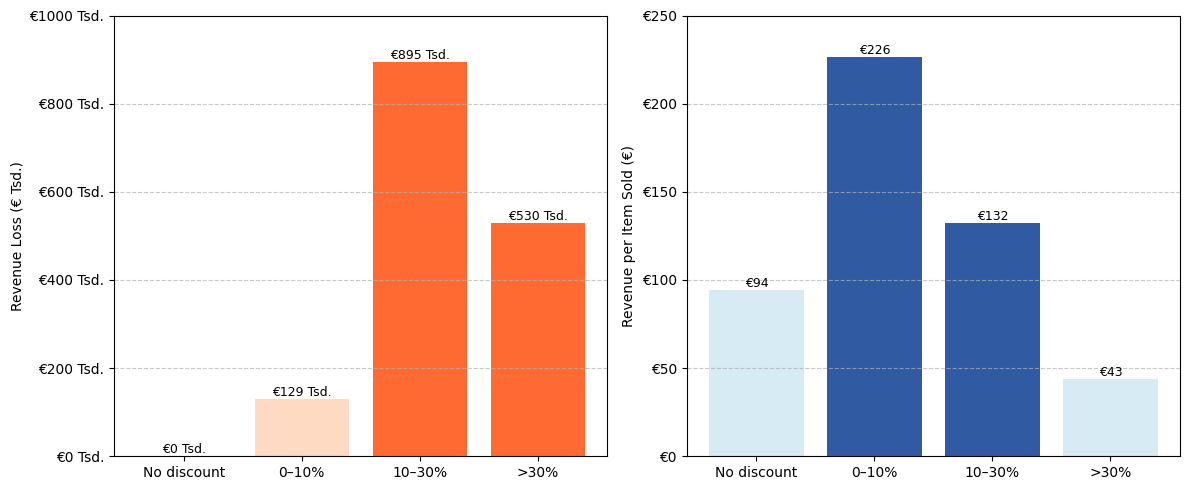

In [290]:
import matplotlib.pyplot as plt

n = len(strategy_revenue_reset)

# ---- Color logic ----
left_colors = ['#FFD1B3' if i < 2 else '#FF4500' for i in range(n)]
right_colors = ['#CFE8F3' if i in (0, n-1) else '#0B3D91' for i in range(n)]

fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True)

# ---- Plot 1: Revenue Loss (Left) ----
bars_left = axes[0].bar(
    strategy_revenue_reset['discount_bucket'],
    strategy_revenue_reset['revenue_loss'],
    color=left_colors,
    alpha=0.8
)
axes[0].set_ylabel("Revenue Loss (€ Tsd.)")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# ---- Label left bars in Tsd. ----
for bar in bars_left:
    height = bar.get_height()
    height_tsd = round(height / 1000)
    axes[0].text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'€{height_tsd} Tsd.',
        ha='center',
        va='bottom',
        fontsize=9
    )

# ---- Format y-axis left in Tsd. ----
axes[0].set_yticks(axes[0].get_yticks())
axes[0].set_yticklabels([f'€{int(y/1000)} Tsd.' for y in axes[0].get_yticks()])

# ---- Plot 2: Revenue Efficiency (Right) ----
bars_right = axes[1].bar(
    strategy_revenue_reset['discount_bucket'],
    strategy_revenue_reset['efficiency'],
    color=right_colors,
    alpha=0.85
)
axes[1].set_ylabel("Revenue per Item Sold (€)")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# ---- Label right bars in full € ----
for bar in bars_right:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'€{int(height):,}',
        ha='center',
        va='bottom',
        fontsize=9
    )

# ---- Format y-axis right in full € ----
axes[1].set_yticks(axes[1].get_yticks())
axes[1].set_yticklabels([f'€{int(y):,}' for y in axes[1].get_yticks()])

plt.tight_layout()
plt.show()


executive conclusion: “Heavy discounting increases units sold, but the additional volume does not compensate for the revenue lost per unit — resulting in lower overall revenue efficiency.”

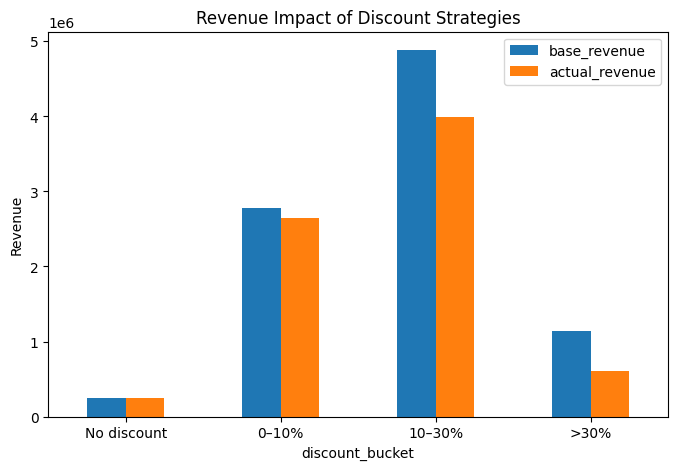

In [159]:
# 3️⃣ Plot 1: Base vs Actual revenue per strategy
# 👉 This directly shows how discounts influence revenue

ax = strategy_revenue[["base_revenue", "actual_revenue"]].plot(
    kind="bar",
    figsize=(8,5)
)

ax.set_ylabel("Revenue")
ax.set_title("Revenue Impact of Discount Strategies")
plt.xticks(rotation=0)
plt.show()

# “The gap between base and actual revenue widens as discounts increase — this is the revenue sacrificed to drive volume.

In [162]:
print("Orders columns:", orders_cl.columns)
print("Orderlines columns:", orderlines_cl.columns)
print("Products columns:", products_cl.columns)
print("Brands columns:", brands_qu.columns)

Orders columns: Index(['order_id', 'created_date', 'total_paid', 'state'], dtype='object')
Orderlines columns: Index(['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price',
       'date'],
      dtype='object')
Products columns: Index(['sku', 'name', 'desc', 'price', 'in_stock', 'type'], dtype='object')
Brands columns: Index(['short', 'long'], dtype='object')


In [163]:
df_qu.columns

Index(['sku', 'name', 'desc', 'price', 'in_stock', 'type', 'id', 'id_order',
       'product_id', 'product_quantity', 'unit_price', 'date', 'discount',
       'discount_rate', 'base_revenue', 'actual_revenue', 'revenue lost',
       'brand_code', 'short', 'long', 'order_id', 'created_date', 'total_paid',
       'state'],
      dtype='object')

In [164]:
# Calculate discount rate and revenue per line
df_qu['discount_rate'] = (df_qu['price'] - df_qu['unit_price']) / df_qu['price']
df_qu['revenue'] = df_qu['unit_price'] * df_qu['product_quantity']


In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check column names
print("Orders columns:", orders_cl.columns)
print("Orderlines columns:", orderlines_cl.columns)
print("Products columns:", products_cl.columns)
print("Brands columns:", brands_qu.columns)
df_qu.columns

Orders columns: Index(['order_id', 'created_date', 'total_paid', 'state'], dtype='object')
Orderlines columns: Index(['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price',
       'date'],
      dtype='object')
Products columns: Index(['sku', 'name', 'desc', 'price', 'in_stock', 'type'], dtype='object')
Brands columns: Index(['short', 'long'], dtype='object')


Index(['sku', 'name', 'desc', 'price', 'in_stock', 'type', 'id', 'id_order',
       'product_id', 'product_quantity', 'unit_price', 'date', 'discount',
       'discount_rate', 'base_revenue', 'actual_revenue', 'revenue lost',
       'brand_code', 'short', 'long', 'order_id', 'created_date', 'total_paid',
       'state', 'revenue'],
      dtype='object')

/tmp/ipython-input-1621598848.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_revenue = df_qu.groupby('discount_bucket')['actual_revenue'].mean().reset_index()
/tmp/ipython-input-1621598848.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_revenue, x='discount_bucket', y='actual_revenue', palette='viridis')


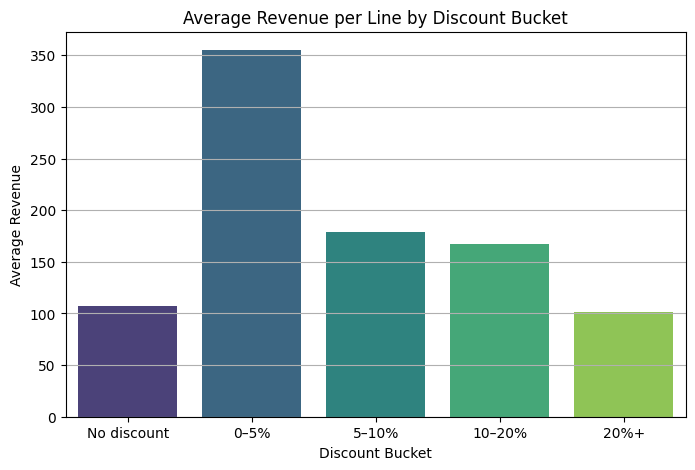

In [167]:
# -----------------------------
# 2. Average Revenue by Discount Bucket
# -----------------------------
bins = [-0.01, 0, 0.05, 0.10, 0.20, 0.50]
labels = ['No discount', '0–5%', '5–10%', '10–20%', '20%+']
df_qu['discount_bucket'] = pd.cut(df_qu['discount_rate'], bins=bins, labels=labels)
avg_revenue = df_qu.groupby('discount_bucket')['actual_revenue'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_revenue, x='discount_bucket', y='actual_revenue', palette='viridis')
plt.title("Average Revenue per Line by Discount Bucket")
plt.xlabel("Discount Bucket")
plt.ylabel("Average Revenue")
plt.grid(axis='y')
plt.show()

# -> Deep discounts increase quantity but reduce revenue per line.

In [168]:
df_qu.columns

Index(['sku', 'name', 'desc', 'price', 'in_stock', 'type', 'id', 'id_order',
       'product_id', 'product_quantity', 'unit_price', 'date', 'discount',
       'discount_rate', 'base_revenue', 'actual_revenue', 'revenue lost',
       'brand_code', 'short', 'long', 'order_id', 'created_date', 'total_paid',
       'state', 'revenue', 'discount_bucket'],
      dtype='object')

/tmp/ipython-input-1420784909.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qty_by_discount = df_qu.groupby('discount_bucket')['product_quantity'].mean().reset_index() # Quantity column -> number of units purchased per order line, and in plot it’s averaged -> typical number of items sold at each discount level.
/tmp/ipython-input-1420784909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=qty_by_discount, x='discount_bucket', y='product_quantity', palette='magma')


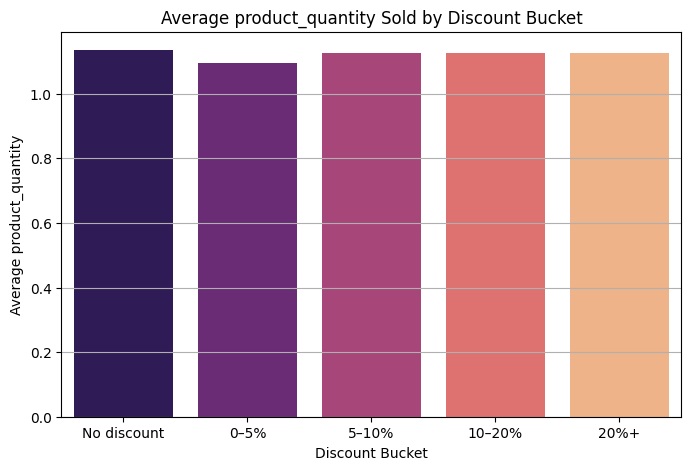

In [169]:
# -----------------------------
# 3. Average Quantity Sold by Discount Bucket
# -----------------------------
qty_by_discount = df_qu.groupby('discount_bucket')['product_quantity'].mean().reset_index() # Quantity column -> number of units purchased per order line, and in plot it’s averaged -> typical number of items sold at each discount level.
plt.figure(figsize=(8,5))
sns.barplot(data=qty_by_discount, x='discount_bucket', y='product_quantity', palette='magma')
plt.title("Average product_quantity Sold by Discount Bucket")
plt.xlabel("Discount Bucket")
plt.ylabel("Average product_quantity")
plt.grid(axis='y')
plt.show()

# -> Multi-item orders significantly increase total revenue (bundling effect).

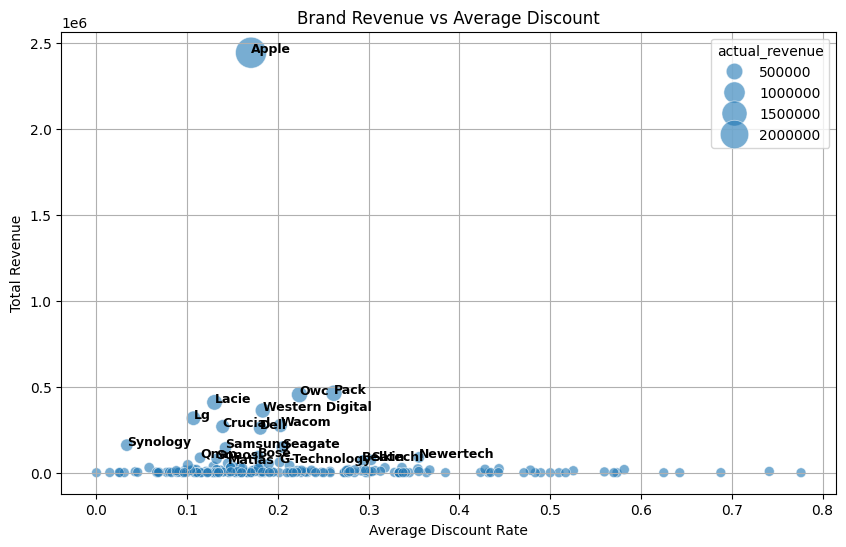

In [170]:
# -----------------------------
# 4. Brand-Level Discount Sensitivity
# -----------------------------
brand_analysis = df_qu.groupby('long').agg({'actual_revenue':'sum', 'discount_rate':'mean'}).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_analysis, x='discount_rate', y='actual_revenue', size='actual_revenue', sizes=(50, 500), alpha=0.6)
plt.title("Brand Revenue vs Average Discount")
plt.xlabel("Average Discount Rate")
plt.ylabel("Total Revenue")

# Label the top 10 brands by revenue
top20 = brand_analysis.nlargest(20, 'actual_revenue')
for i, row in top20.iterrows():
    plt.text(row['discount_rate'], row['actual_revenue'], row['long'], fontsize=9, weight='bold')
plt.grid(True)

plt.show()

# -> Brands with smaller discounts still drive higher revenue (premium strategy).

In [206]:
lines_per_order = df_qu.groupby('order_id').agg(
    num_items=('product_quantity','count'),        # number of items in the order
    total_revenue=('actual_revenue','sum'),  # total revenue
    avg_discount=('discount_rate','mean')    # average discount rate
).reset_index()


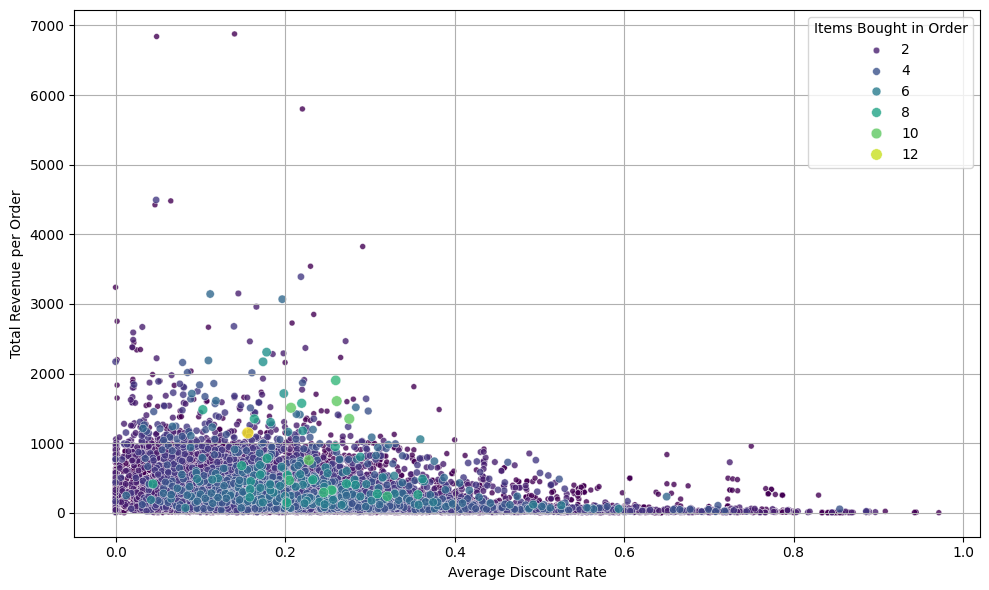

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate per order
lines_per_order = df_qu.groupby('order_id').agg(
    num_items=('product_id','count'),        # number of items in the order
    total_revenue=('actual_revenue','sum'),  # total revenue
    avg_discount=('discount_rate','mean')    # average discount rate
).reset_index()

# Sort so largest orders are last (plotted on top)
lines_per_order = lines_per_order.sort_values('num_items')

plt.figure(figsize=(10,6))
scatter = sns.scatterplot(
    data=lines_per_order,
    x='avg_discount',      # discount rate on X-axis
    y='total_revenue',     # revenue on Y-axis
    size='num_items',      # size = number of items
    hue='num_items',       # color = number of items
    palette='viridis',
    alpha=0.8,
    legend='brief'         # show brief legend for hue/size
)

plt.xlabel("Average Discount Rate")
plt.ylabel("Total Revenue per Order")
plt.grid(True)

# ---- Move legend inside plot, top-right corner ----
plt.legend(
    title='Items Bought in Order',
    loc='upper right',       # inside plot
    bbox_to_anchor=(1, 1),   # adjust if necessary
    frameon=True,            # draw a box around legend
    fancybox=True
)

plt.tight_layout()
plt.show()



Axes and Encodings

X-axis (avg_discount) → average discount applied to the order.

Left = low/no discount

Right = higher discounts

Y-axis (total_revenue) → total revenue per order.

Higher points = higher revenue

Point Size (num_items) → number of items in the order.

Bigger points = multi-item orders → bundling effect

Point Color (num_items) → reinforces size visually.

Darker/brighter color = more items

Step 1: Bundling Effect

Look along the size/color dimension:

Big, bright points high on the Y-axis → multi-item orders generating high revenue.

Confirms that bundling increases total order revenue.

Step 2: Discount Effect

Look along the X-axis and size/color:

Large points further right (higher discount) high on Y-axis → discounts successfully increase revenue.

Large points further right but low on Y-axis → over-discounting, hurting margins.

Step 3: Revenue Efficiency

Compare small vs large points at the same X-axis (discount):

Multi-item orders with moderate discounts → ideal combination of bundling + discount.

Single-item orders with high discount → may be unnecessary and reduce efficiency.

Step 4: Patterns to highlight

Positive trend: Larger orders tend to generate more revenue → bundling works.

Optimal discount range: Not every big discount increases revenue.

Outliers:

High revenue at low discounts → strong products, don’t need discounts.

Low revenue at high discounts → poor discount strategy or weak products.

Key Takeaways

Focus on tiered discounts for multi-item orders.

Avoid over-discounting single-item orders.

Highlight top-performing bundles for promotional campaigns.

In [186]:
df_qu

,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,...,revenue lost,brand_code,short,long,order_id,created_date,total_paid,state,revenue,discount_bucket
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1121326,300551,0,1,...,5.00,RAI,RAI,Rain Design,300551,2017-01-02 13:37:16,54.99,Completed,54.99,5–10%
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149253,310820,0,1,...,10.00,RAI,RAI,Rain Design,310820,2017-01-17 09:39:32,49.99,Completed,49.99,10–20%
2,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1149773,311042,0,1,...,10.00,RAI,RAI,Rain Design,311042,2017-01-17 16:04:40,49.99,Completed,49.99,10–20%
3,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1181573,324568,0,1,...,5.00,RAI,RAI,Rain Design,324568,2017-02-15 13:43:09,59.98,Completed,54.99,5–10%
4,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,1188189,327565,0,1,...,5.00,RAI,RAI,Rain Design,327565,2017-02-22 13:22:25,248.96,Completed,54.99,5–10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51655,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1499671,464365,0,1,...,7.00,MMW,MMW,My Mw,464365,2017-12-16 14:47:48,27.98,Completed,22.99,20%+
51656,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1523146,475426,0,1,...,10.45,MMW,MMW,My Mw,475426,2017-12-28 20:41:08,24.53,Completed,19.54,20%+
51657,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1559235,490325,0,2,...,14.00,MMW,MMW,My Mw,490325,2018-01-13 23:19:50,135.96,Completed,45.98,20%+
51658,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,13835403,1596455,496812,0,1,...,7.00,MMW,MMW,My Mw,496812,2018-02-07 12:32:13,104.97,Completed,22.99,20%+


In [ ]:
df_qu.columns

In [209]:
product_summary = (
    products_orderlines_qu.groupby('sku', as_index=False)
    .agg(
        product_name=('name', 'first'),
        avg_price=('price','mean'),
        avg_unit_price=('unit_price','mean'),
        discount_rate=('is_discounted','mean'),
        avg_discount_pct=('discount_rate','mean'),
        total_units=('unit_price','count'),
        total_revenue=('unit_price','sum')
    )
)
product_summary

,sku,product_name,avg_price,avg_unit_price,discount_rate,avg_discount_pct,total_units,total_revenue
0,8MO0001-A,Open - Micro SD Adapter 8Mobility iSlice Macbo...,35.00,12.96,1.00,0.63,1,12.96
1,8MO0003-A,Open - 8Mobility iSlice Micro SD adapter for M...,35.00,12.85,1.00,0.63,1,12.85
2,8MO0007,8Mobility iSlice Micro SD adapter for Macbook ...,35.00,22.28,1.00,0.36,7,155.93
3,8MO0008,8Mobility iSlice Micro SD Adapter Macbook Pro ...,35.00,21.59,1.00,0.38,10,215.90
4,8MO0009,8Mobility iSlice Micro SD Adapter for Macbook ...,35.00,17.47,1.00,0.50,5,87.37
...,...,...,...,...,...,...,...,...
5032,ZAG0040,Zagg Glass Screen Protector + Contour Contour ...,39.99,26.99,1.00,0.33,1,26.99
5033,ZAG0041,Zagg iPhone Glass Screen Protector + 8 Plus / ...,29.99,19.99,1.00,0.33,1,19.99
5034,ZAG0042,Zagg Glass Screen Protector + iPhone 8/7 / 6 / 6S,29.99,19.99,1.00,0.33,1,19.99
5035,ZEP0007,Zepp Golf Golf Amarillo Sensor Kit,149.99,125.99,1.00,0.16,1,125.99


In [210]:
# discount strategy by sku
# Step 1: Revenue and volume per sku
product_sku_perf = df_qu.groupby('sku').agg(
    total_actual_revenue=("actual_revenue", "sum"),
    total_revenue=('base_revenue', 'sum'),
    total_quantity=('product_quantity', 'sum'),
    avg_revenue_per_unit=('base_revenue', 'mean'),
    avg_discount=("discount_rate", "mean")
).reset_index()
product_sku_perf.sort_values(
    by='avg_revenue_per_unit',
    ascending=False
)

,sku,total_actual_revenue,total_revenue,total_quantity,avg_revenue_per_unit,avg_discount
3595,PAC2061,1598.00,2398.00,2,2398.00,0.33
3154,OWC0080,1413.16,1815.98,2,1815.98,0.22
3600,PAC2067,479.00,1799.00,1,1799.00,0.73
3603,PAC2071,489.00,1799.00,1,1799.00,0.73
3599,PAC2065,499.00,1799.00,1,1799.00,0.72
...,...,...,...,...,...,...
4752,WAC0127,9.80,9.80,2,4.90,0.00
1846,IFX0137,55.46,55.86,14,4.66,0.01
1350,DOD0015,44.70,52.35,15,4.03,0.15
1807,IFX0049,7.98,7.98,2,3.99,0.00


In [211]:
# Step 2: Define thresholds using medians (robust & data-driven)
actual_revenue_median_persku = product_sku_perf['total_actual_revenue'].median()
revenue_median_persku = product_sku_perf['total_revenue'].median()
quantity_median_persku = product_sku_perf['total_quantity'].median()
actual_revenue_median_persku, revenue_median_persku, quantity_median_persku

(264.89, 349.93, 3.0)

In [212]:
def actual_discount_strategy(row):
    d = row["avg_discount"]

    if d <= 0.05:
        return "0–5% (protect margin, bundle anchor)"
    elif d <= 0.10:
        return "5–10% (targeted / bundle-only)"
    elif d <= 0.30:
        return "15–30% (add-on & bundle driver)"
    else:
        return "over 30% (consider removal)"

product_sku_perf["actual_discount_strategy"] = (
    product_sku_perf.apply(actual_discount_strategy, axis=1)
)

In [230]:
def classify(row):
    if row['total_revenue'] >= revenue_median_persku and row['total_quantity'] >= quantity_median_persku:
        return 'High revenue / High volume'
    elif row['total_revenue'] >= revenue_median_persku and row['total_quantity'] < quantity_median_persku:
        return 'High revenue / Low volume'
    elif row['total_revenue'] < revenue_median_persku and row['total_quantity'] >= quantity_median_persku:
        return 'Low revenue / High volume'
    else:
        return 'Low revenue / Low volume'

product_sku_perf['strategy_group'] = product_sku_perf.apply(classify, axis=1)
product_sku_perf

,sku,total_actual_revenue,total_revenue,total_quantity,avg_revenue_per_unit,avg_discount,actual_discount_strategy,strategy_group
0,8MO0001-A,12.96,35.00,1,35.00,0.63,over 30% (consider removal),Low revenue / Low volume
1,8MO0003-A,12.85,35.00,1,35.00,0.63,over 30% (consider removal),Low revenue / Low volume
2,8MO0007,155.93,245.00,7,35.00,0.36,over 30% (consider removal),Low revenue / High volume
3,8MO0008,235.89,385.00,11,38.50,0.38,over 30% (consider removal),High revenue / High volume
4,8MO0009,87.37,175.00,5,35.00,0.50,over 30% (consider removal),Low revenue / High volume
...,...,...,...,...,...,...,...,...
5032,ZAG0040,26.99,39.99,1,39.99,0.33,over 30% (consider removal),Low revenue / Low volume
5033,ZAG0041,19.99,29.99,1,29.99,0.33,over 30% (consider removal),Low revenue / Low volume
5034,ZAG0042,19.99,29.99,1,29.99,0.33,over 30% (consider removal),Low revenue / Low volume
5035,ZEP0007,125.99,149.99,1,149.99,0.16,15–30% (add-on & bundle driver),Low revenue / Low volume


In [320]:
# Step 4: Assign profit-maximizing discount strategy
strategy_map_persku = {
    'High revenue / High volume': '0–5% (protect margin, bundle anchor)',
    'High revenue / Low volume': '5–10% (targeted / bundle-only)',
    'Low revenue / High volume': '15–30% (add-on & bundle driver)',
    'Low revenue / Low volume': 'No discount / consider removal'
}

custom_palette = {
    '0–5% (protect margin, bundle anchor)': 'black',   # was green
    '5–10% (targeted / bundle-only)': '#1f77b4',       # blue
    '15–30% (add-on & bundle driver)': '#ff7f0e',      # orange
    'No discount / consider removal': '#d62728'        # red
}

product_sku_perf['recommended_discount_strategy'] = product_sku_perf['strategy_group'].map(strategy_map_persku)


# Display final strategy table
product_sku_perf.sort_values('total_revenue', ascending=False)

,sku,total_actual_revenue,total_revenue,total_quantity,avg_revenue_per_unit,avg_discount,actual_discount_strategy,strategy_group,recommended_discount_strategy
2333,LGE0044,133575.86,141364.00,236,713.96,0.05,5–10% (targeted / bundle-only),High revenue / High volume,"0–5% (protect margin, bundle anchor)"
757,APP2446,104560.64,121319.10,270,466.61,0.14,15–30% (add-on & bundle driver),High revenue / High volume,"0–5% (protect margin, bundle anchor)"
647,APP1922,86473.26,96123.00,537,188.11,0.10,5–10% (targeted / bundle-only),High revenue / High volume,"0–5% (protect margin, bundle anchor)"
657,APP1970,80715.76,93437.00,223,424.71,0.14,15–30% (add-on & bundle driver),High revenue / High volume,"0–5% (protect margin, bundle anchor)"
774,APP2477,85301.93,87372.00,108,856.59,0.02,"0–5% (protect margin, bundle anchor)",High revenue / High volume,"0–5% (protect margin, bundle anchor)"
...,...,...,...,...,...,...,...,...,...
1843,IFX0134,6.99,6.99,1,6.99,0.00,"0–5% (protect margin, bundle anchor)",Low revenue / Low volume,No discount / consider removal
1842,IFX0133,6.64,6.99,1,6.99,0.05,5–10% (targeted / bundle-only),Low revenue / Low volume,No discount / consider removal
1779,IFX0017,5.98,5.98,2,5.98,0.00,"0–5% (protect margin, bundle anchor)",Low revenue / Low volume,No discount / consider removal
2115,KIN0125,3.99,4.99,1,4.99,0.20,15–30% (add-on & bundle driver),Low revenue / Low volume,No discount / consider removal


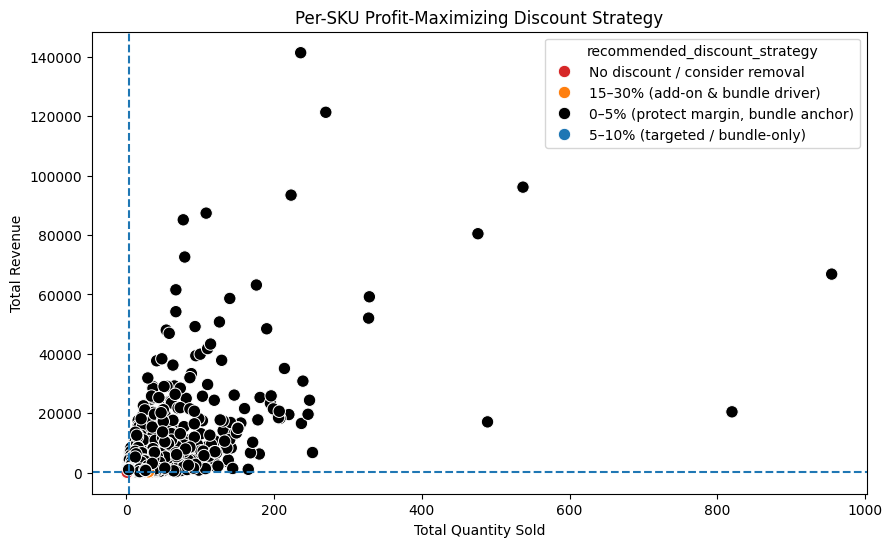

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=product_sku_perf,
    x="total_quantity",
    y="total_revenue",
    hue="recommended_discount_strategy",
    palette=custom_palette,
    s=80
)

plt.axvline(product_sku_perf["total_quantity"].median(), linestyle="--")
plt.axhline(product_sku_perf["total_revenue"].median(), linestyle="--")

plt.xlabel("Total Quantity Sold")
plt.ylabel("Total Revenue")
plt.title("Per-SKU Profit-Maximizing Discount Strategy")

plt.show()


0–5% → protect margin on hero SKUs

5–10% → selective activation for premium items

15–30% → volume & basket-building tools

No discount → candidates for delisting or redesign

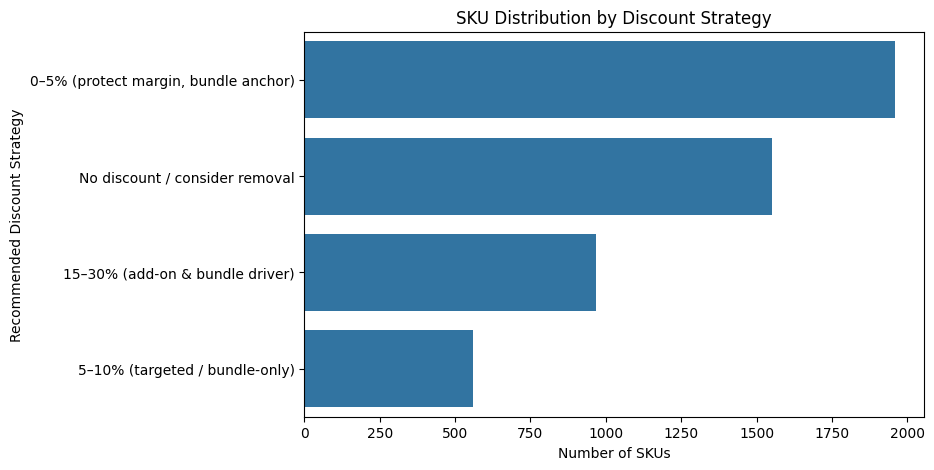

In [235]:
plt.figure(figsize=(8, 5))

sns.countplot(
    data=product_sku_perf,
    y="recommended_discount_strategy",
    order=product_sku_perf["recommended_discount_strategy"].value_counts().index
)

plt.xlabel("Number of SKUs")
plt.ylabel("Recommended Discount Strategy")
plt.title("SKU Distribution by Discount Strategy")

plt.show()


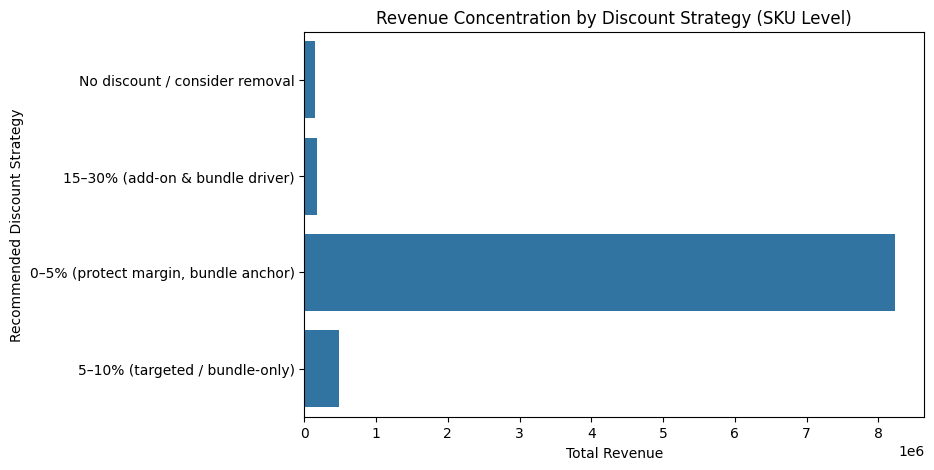

In [236]:
plt.figure(figsize=(8, 5))

sns.barplot(
    data=product_sku_perf,
    x="total_revenue",
    y="recommended_discount_strategy",
    estimator=sum,
    errorbar=None
)

plt.xlabel("Total Revenue")
plt.ylabel("Recommended Discount Strategy")
plt.title("Revenue Concentration by Discount Strategy (SKU Level)")

plt.show()


In [221]:
# ==========================================================
# NEW: PROFIT-ORIENTED DISCOUNT STRATEGY BY PRODUCT TYPE
# ==========================================================

# Step 1: Revenue and volume per product type
product_type_perf = df_qu.groupby('type').agg(
    total_actual_revenue=("actual_revenue", "sum"),
    total_revenue=('base_revenue', 'sum'),
    total_quantity=('product_quantity', 'sum'),
    avg_revenue_per_unit=('base_revenue', 'mean'),
    avg_discount=("discount_rate", "mean")
).reset_index()
product_type_perf.sort_values(
    by='avg_revenue_per_unit',
    ascending=False
)

,type,total_actual_revenue,total_revenue,total_quantity,avg_revenue_per_unit,avg_discount
93,51882158,3387.59,11991.00,9,1498.88,0.72
65,"2,16E+11",1859.59,2558.00,2,1279.00,0.27
85,"5,43E+15",6122.09,25779.00,21,1227.57,0.76
89,"5,72E+15",2069.03,3597.00,3,1199.00,0.42
5,113271716,1998.00,2318.00,2,1159.00,0.14
66,"2,17E+11",96382.60,112881.79,102,1117.64,0.15
36,1282,119037.83,151035.34,162,1000.23,0.18
91,51861714,11205.03,13576.00,14,969.71,0.17
6,113281716,184121.27,190913.00,207,949.82,0.04
111,85651716,123600.04,136620.98,157,887.15,0.09


In [222]:
# Step 2: Define thresholds using medians (robust & data-driven)
actual_revenue_median = product_type_perf['total_actual_revenue'].median()
revenue_median = product_type_perf['total_revenue'].median()
quantity_median = product_type_perf['total_quantity'].median()
actual_revenue_median, revenue_median, quantity_median

(12423.029999999999, 15527.71, 161.0)

In [223]:
# Step 3: Classify product types into 4 groups

def classify(row):
    if row['total_revenue'] >= revenue_median and row['total_quantity'] >= quantity_median:
        return 'High revenue / High volume'
    elif row['total_revenue'] >= revenue_median and row['total_quantity'] < quantity_median:
        return 'High revenue / Low volume'
    elif row['total_revenue'] < revenue_median and row['total_quantity'] >= quantity_median:
        return 'Low revenue / High volume'
    else:
        return 'Low revenue / Low volume'

product_type_perf['strategy_group'] = product_type_perf.apply(classify, axis=1)
product_type_perf

,type,total_actual_revenue,total_revenue,total_quantity,avg_revenue_per_unit,avg_discount,strategy_group
0,"1,44E+11",2920.37,3179.56,44,72.26,0.07,Low revenue / Low volume
1,10142,80037.77,100590.73,843,125.42,0.20,High revenue / High volume
2,101781405,1570.55,1688.76,124,16.72,0.05,Low revenue / Low volume
3,10230,7042.96,9351.14,186,51.38,0.25,Low revenue / High volume
4,106431714,144775.09,153169.00,181,850.94,0.05,High revenue / High volume
5,113271716,1998.00,2318.00,2,1159.00,0.14,Low revenue / Low volume
6,113281716,184121.27,190913.00,207,949.82,0.04,High revenue / High volume
7,113291716,231923.88,238514.00,286,870.49,0.03,High revenue / High volume
8,113464259,181.04,199.00,1,199.00,0.09,Low revenue / Low volume
9,113851714,319.00,402.81,1,402.81,0.21,Low revenue / Low volume


In [224]:
# Step 3: Classify product types into 4 groups

def classify(row):
    if row['avg_discount'] >= revenue_median and row['total_quantity'] >= quantity_median:
        return 'High revenue / High volume'
    elif row['total_revenue'] >= revenue_median and row['total_quantity'] < quantity_median:
        return 'High revenue / Low volume'
    elif row['total_revenue'] < revenue_median and row['total_quantity'] >= quantity_median:
        return 'Low revenue / High volume'
    else:
        return 'Low revenue / Low volume'

product_type_perf['strategy_group'] = product_type_perf.apply(classify, axis=1)
product_type_perf

,type,total_actual_revenue,total_revenue,total_quantity,avg_revenue_per_unit,avg_discount,strategy_group
0,"1,44E+11",2920.37,3179.56,44,72.26,0.07,Low revenue / Low volume
1,10142,80037.77,100590.73,843,125.42,0.20,Low revenue / Low volume
2,101781405,1570.55,1688.76,124,16.72,0.05,Low revenue / Low volume
3,10230,7042.96,9351.14,186,51.38,0.25,Low revenue / High volume
4,106431714,144775.09,153169.00,181,850.94,0.05,Low revenue / Low volume
5,113271716,1998.00,2318.00,2,1159.00,0.14,Low revenue / Low volume
6,113281716,184121.27,190913.00,207,949.82,0.04,Low revenue / Low volume
7,113291716,231923.88,238514.00,286,870.49,0.03,Low revenue / Low volume
8,113464259,181.04,199.00,1,199.00,0.09,Low revenue / Low volume
9,113851714,319.00,402.81,1,402.81,0.21,Low revenue / Low volume


In [225]:
# Step 4: Assign profit-maximizing discount strategy
strategy_map = {
    'High revenue / High volume': '0–5% (protect margin, bundle anchor)',
    'High revenue / Low volume': '5–10% (targeted / bundle-only)',
    'Low revenue / High volume': '15–30% (add-on & bundle driver)',
    'Low revenue / Low volume': 'No discount / consider removal'
}

product_type_perf['recommended_discount_strategy'] = product_type_perf['strategy_group'].map(strategy_map)

# Display final strategy table
product_type_perf.sort_values('total_revenue', ascending=False).head(10)

,type,total_actual_revenue,total_revenue,total_quantity,avg_revenue_per_unit,avg_discount,strategy_group,recommended_discount_strategy
15,11935397,684715.38,813262.30,4061,221.66,0.17,Low revenue / Low volume,No discount / consider removal
37,1296,601594.19,697771.27,1576,514.20,0.14,Low revenue / Low volume,No discount / consider removal
22,12215397,442987.49,522135.15,2261,270.12,0.14,Low revenue / Low volume,No discount / consider removal
21,12175397,452394.39,495625.72,1090,463.63,0.08,Low revenue / Low volume,No discount / consider removal
32,12655397,382138.62,475340.99,2783,261.03,0.19,Low revenue / Low volume,No discount / consider removal
46,1364,373489.04,447915.86,3697,147.24,0.15,Low revenue / Low volume,No discount / consider removal
14,11905404,280029.40,369626.05,3648,119.62,0.22,Low revenue / Low volume,No discount / consider removal
90,51601716,310145.64,363298.90,803,456.98,0.15,Low revenue / Low volume,No discount / consider removal
94,5384,256904.69,331029.74,2537,142.99,0.29,Low revenue / Low volume,No discount / consider removal
55,1405,248143.27,313413.22,1317,265.16,0.22,Low revenue / Low volume,No discount / consider removal


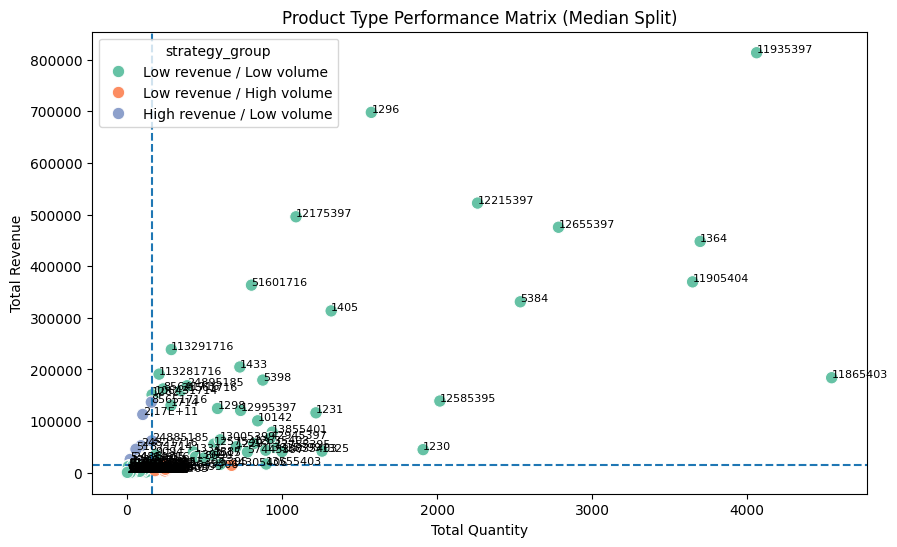

In [227]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=product_type_perf,
    x="total_quantity",
    y="total_revenue",
    hue="strategy_group",
    palette="Set2",
    s=80
)

# Median split lines
plt.axvline(quantity_median, linestyle="--")
plt.axhline(revenue_median, linestyle="--")

plt.xlabel("Total Quantity")
plt.ylabel("Total Revenue")
plt.title("Product Type Performance Matrix (Median Split)")

for _, row in product_type_perf.iterrows():
    plt.text(
        row["total_quantity"],
        row["total_revenue"],
        row["type"],
        fontsize=8
    )


plt.show()

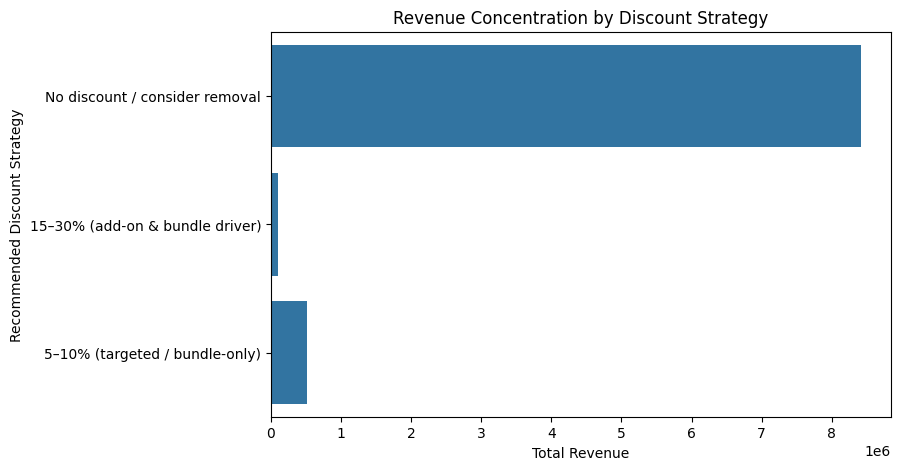

In [229]:
plt.figure(figsize=(8, 5))

sns.barplot(
    data=product_type_perf,
    x="total_revenue",
    y="recommended_discount_strategy",
    estimator=sum,
    errorbar=None
)

plt.xlabel("Total Revenue")
plt.ylabel("Recommended Discount Strategy")
plt.title("Revenue Concentration by Discount Strategy")

plt.show()

In [ ]:
First devision:

ELCINs PART — BRAND, PRICING & PSYCHOLOGY (Foundation)
1. Positioning Rule: premium-value, not discount.
Price must signal: Safety, Compatibility, Quality, Design
Discounts must feel like access, not desperation.
2. Price Integrity Rules:
Never discount new releases in first 60 days -> Protects perceived value
Never exceed 25% publicly (except BF)-> Maintains premium image
Never run permanent sales-> Prevents customer price training
Always return to full price -> Resets value anchor
3. Perception Management
Use value framing, not price framing:
“Upgrade Kit” instead of “Bundle”
“Member Access” instead of “Discount”
“Event” instead of “Sale”
JUANs/FRANKs Part — PROFIT & FINANCIAL SAFETY (Control System)
4. Discount Cap Formula: Max Discount = Gross Margin – Minimum Target Profit
Example: Retail price: $100, Cost: $55 -> Margin: 45% , Target profit: 15% → Max safe discount = 30%
Never exceed this on current products.
5. Category Safety Limits
Product -           Normal Max-    Event Max
Cables-              20% -                 35–40%
Chargers, hubs. 20%.                  30–35%
Premium cases. 15%.                  25–30%
Bundles.             20%.                  40–45%
6. Margin Protection Tools
Minimum cart values
Bundles only for high discounts
Tiered thresholds ($75 / $150 / $250)
FRANKs/JUANs PART — DISCOUNT MECHANICS (Growth Engine)
7. Always-On Smart Discounts
Purpose-               Strategy
New customers.   7–12% first-order
Bigger carts.         Buy 2 → 8%, Buy 3 → 15%(see column product quantity)
Loyalty                  Tiered pricing (8–15%)
Slow stock.           Category-specific clearance (here also not completed orders must be compared with completed, maybe if same products, then apply same strategy as by completed instead of stock clearing)
8. Device-Based Bundles
iPhone Protection Kit → 15%
MacBook Desk Kit → 20%
Travel Charging Kit → 20–30%
This sells systems, not items.
9. Flash & Seasonal Events
24–48 hours max
1 per quarter
One category at a time
Creates urgency without brand erosion.
SONJAs PART — BLACK FRIDAY & HIGH-IMPACT EVENTS (Revenue Accelerator)
10. Black Friday Rules
Type.                              Discount
Hero SKUs                   35–40%
Standard accessories. 25–35%
Bundles.                       30–45%
Premium lines.             20–30%
11. Event Structure
VIP early access
Tiered spend rewards
Limited stock messages
Hard end date
12. Post-Event Reset
No extensions
Return to premium pricing
Thank customers
Tease next launch
This resets price perception.
Enyacs FINAL PRINCIPLE:
Discounts should build ecosystem — not train customers.